# Intelligent Agriculture: Utilising Machine Learning for Efficient irrigation- Tackling current challenges and Investigating future opportunities

# Predicting Whether the Water Quality is fit for Irrigation based on Water Quality Parameters using ML

## IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np 
import pandas as pd

# For Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import scipy.stats as stats

import warnings
def warns(*args,**kwargs): pass
warnings.warn=warns

## READING THE DATASET FROM A COMMA SEPARATED VALUES FILE

In [2]:
df = pd.read_csv('water_quality_.csv')
print('Data Shape: ', df.shape)
df.sample(10)

Data Shape:  (5060, 9)


ph    Hardness        Solids  Chloramines     Sulfate  \
2425  6.798726   83.460951    127.330747     0.959097   11.581326   
4273  6.655995   55.463211    104.406722     0.973189   18.657010   
356   7.255137   53.779181    113.754944     0.740324   13.097646   
3407  7.254092  102.505271    178.593613     1.249793   28.355962   
912   7.078275  118.348819    153.152926     1.398920   21.099099   
2192  7.031553  117.809858    155.644191     1.263544   29.176179   
930   6.717893   60.289719    148.533401     0.500120   12.172574   
3290  6.557843   57.061177    117.626462     0.709182   12.725476   
21    6.576845  156.221768  12772.095750     9.759898  341.749378   
4402  7.215825   70.658626    117.838525     0.709000   14.196723   

      Organic_carbon  Trihalomethanes  Turbidity  Check  
2425        1.195258         0.058272   0.659650    1.0  
4273        1.491241         0.060966   0.840868    1.0  
356         1.410427         0.096000   0.706758    1.0  
3407        1.552868         0.148875   1.099234    0.0  
912         1.594668         0.117949   1.276316    0.0  
2192        1.511169         0.108432   1.160678    0.0  
930         1.253277         0.074485   0.853280    1.0  
3290        1.093349         0.082273   0.667039    1.0  
21         10.382253        78.305180   3.771314    0.0  
4402        1.399375         0.082726   0.617757    1.0

## DATA TYPES OF ALL THE COLUMNS

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5060 entries, 0 to 5059
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               5060 non-null   float64
 1   Hardness         5060 non-null   float64
 2   Solids           5060 non-null   float64
 3   Chloramines      5060 non-null   float64
 4   Sulfate          5060 non-null   float64
 5   Organic_carbon   5060 non-null   float64
 6   Trihalomethanes  5060 non-null   float64
 7   Turbidity        5060 non-null   float64
 8   Check            5060 non-null   float64
dtypes: float64(9)
memory usage: 355.9 KB


## CHECKING FOR MISSING (NaN) VALUES IN THE DATASET

In [4]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Check              0
dtype: int64

## SUMMARY OF STATISTICS

In [5]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  5060.000000  5060.000000   5060.000000  5060.000000  5060.000000   
mean      7.127199   101.114795    396.949171     1.070433    23.714401   
std       0.310592    30.849033   2395.770172     0.773910    34.320078   
min       3.989032    50.000582    100.012050     0.500026    10.001577   
25%       6.998777    75.016961    124.543855     0.746881    15.066437   
50%       7.168608   100.548747    150.673931     1.007072    20.120668   
75%       7.342055   125.938981    175.840705     1.248924    25.196181   
max      10.811290   258.903489  40175.206090    11.543190   387.299907   

       Organic_carbon  Trihalomethanes    Turbidity        Check  
count     5060.000000      5060.000000  5060.000000  5060.000000  
mean         1.653153         0.921616     1.157150     0.498221  
std          1.471352         7.689776     0.525352     0.500046  
min          1.000602         0.050013     0.500306     0.000000  
25%          1.250012         0.076086     0.758188     0.000000  
50%          1.506150         0.100604     1.009044     0.000000  
75%          1.760381         0.125812     1.512920     1.000000  
max         21.208477       111.115310     5.481691     1.000000

## CHECKING FOR DUPLICATE VALUES

In [6]:
df.duplicated().sum()

0

## NUMBER OF ROWS AGAINST EACH LABEL

In [7]:
print("Number of Records Against Eash Label")
print("-"*35)
print(df['Check'].value_counts() )

Number of Records Against Eash Label
-----------------------------------
Check
0.0    2539
1.0    2521
Name: count, dtype: int64


## COLUMN NAMES

In [8]:
print(df.columns)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Organic_carbon',
       'Trihalomethanes', 'Turbidity', 'Check'],
      dtype='object')


## FEATURES SELECTION

In [9]:
selected_features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Organic_carbon','Trihalomethanes', 'Turbidity']
selected_features

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

## CORRELATION MATRICES

In [10]:
# Rank the data
ranked_data = df.rank()
# Calculate Spearman's correlation
corr_spearman = ranked_data.corr(method='spearman')
# Calculate Pearson correlation
corr_pearson = df.corr(method='pearson')
# Calculate Kendall's Tau correlation
corr_kendall = ranked_data.corr(method='kendall')

### RANKED DATA

In [11]:
ranked_data

ph  Hardness  Solids  Chloramines  Sulfate  Organic_carbon  \
0     1038.0    5042.0  5026.0       5016.0   5015.0          5060.0   
1     5047.0    5014.0  5042.0       5053.0   5004.0          5042.0   
2     5048.0    5029.0  5014.0       5030.0   5029.0          5007.0   
3     5037.0    5057.0  5056.0       5042.0   5036.0          5005.0   
4     4966.0    5035.0  5046.0       5027.0   5020.0          5052.0   
...      ...       ...     ...          ...      ...             ...   
5055  1100.0    1149.0   312.0       2033.0    950.0           625.0   
5056  2770.0    4587.0  4766.0       3001.0   4696.0          4572.0   
5057  1631.0    4746.0  2862.0       2619.0   3249.0          4460.0   
5058  4748.0      11.0   777.0        793.0    475.0          1666.0   
5059  2308.0    4282.0  4227.0       4163.0   3080.0          3074.0   

      Trihalomethanes  Turbidity   Check  
0              5037.0     5059.0  3800.0  
1              5059.0     5053.0  3800.0  
2              5031.0     5040.0  1270.0  
3              5058.0     5013.0  3800.0  
4              5032.0     5044.0  3800.0  
...               ...        ...     ...  
5055           1818.0      737.0  3800.0  
5056           4569.0     2802.0  1270.0  
5057           3727.0     4328.0  1270.0  
5058           1898.0      110.0  3800.0  
5059           4027.0     4600.0  1270.0  

[5060 rows x 9 columns]

### PEARSON CORRELATION MATRIX

In [12]:
corr_pearson

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.345786 -0.061244     0.100754  0.055295   
Hardness         0.345786  1.000000  0.326534     0.561211  0.443540   
Solids          -0.061244  0.326534  1.000000     0.853520  0.920928   
Chloramines      0.100754  0.561211  0.853520     1.000000  0.928918   
Sulfate          0.055295  0.443540  0.920928     0.928918  1.000000   
Organic_carbon   0.067078  0.455809  0.906313     0.923845  0.955768   
Trihalomethanes -0.017061  0.326768  0.925890     0.874736  0.955428   
Turbidity        0.258102  0.750314  0.512250     0.720478  0.626076   
Check           -0.396380 -0.817597 -0.038136    -0.340650 -0.167973   

                 Organic_carbon  Trihalomethanes  Turbidity     Check  
ph                     0.067078        -0.017061   0.258102 -0.396380  
Hardness               0.455809         0.326768   0.750314 -0.817597  
Solids                 0.906313         0.925890   0.512250 -0.038136  
Chloramines            0.923845         0.874736   0.720478 -0.340650  
Sulfate                0.955768         0.955428   0.626076 -0.167973  
Organic_carbon         1.000000         0.917559   0.635606 -0.189228  
Trihalomethanes        0.917559         1.000000   0.539145 -0.024508  
Turbidity              0.635606         0.539145   1.000000 -0.708264  
Check                 -0.189228        -0.024508  -0.708264  1.000000

### SPEARMAN'S CORRELATION MATRIX

In [13]:
corr_spearman

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.382502  0.361052     0.369965  0.369865   
Hardness         0.382502  1.000000  0.757171     0.759763  0.761163   
Solids           0.361052  0.757171  1.000000     0.757373  0.759709   
Chloramines      0.369965  0.759763  0.757373     1.000000  0.759866   
Sulfate          0.369865  0.761163  0.759709     0.759866  1.000000   
Organic_carbon   0.369674  0.754170  0.758617     0.758315  0.758499   
Trihalomethanes  0.377189  0.760992  0.758704     0.756949  0.757114   
Turbidity        0.372529  0.761094  0.765922     0.760657  0.754773   
Check           -0.428967 -0.850455 -0.849672    -0.849734 -0.850143   

                 Organic_carbon  Trihalomethanes  Turbidity     Check  
ph                     0.369674         0.377189   0.372529 -0.428967  
Hardness               0.754170         0.760992   0.761094 -0.850455  
Solids                 0.758617         0.758704   0.765922 -0.849672  
Chloramines            0.758315         0.756949   0.760657 -0.849734  
Sulfate                0.758499         0.757114   0.754773 -0.850143  
Organic_carbon         1.000000         0.759667   0.761137 -0.849130  
Trihalomethanes        0.759667         1.000000   0.763878 -0.849480  
Turbidity              0.761137         0.763878   1.000000 -0.849643  
Check                 -0.849130        -0.849480  -0.849643  1.000000

### KENDALL'S TAU CORRELATION MATRIX

In [14]:
corr_kendall

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.259157  0.242195     0.248444  0.246739   
Hardness         0.259157  1.000000  0.509653     0.513021  0.514906   
Solids           0.242195  0.509653  1.000000     0.509849  0.512990   
Chloramines      0.248444  0.513021  0.509849     1.000000  0.513261   
Sulfate          0.246739  0.514906  0.512990     0.513261  1.000000   
Organic_carbon   0.248843  0.505690  0.511501     0.511032  0.511337   
Trihalomethanes  0.253346  0.514832  0.511608     0.509352  0.509474   
Turbidity        0.249681  0.514983  0.521338     0.514387  0.506247   
Check           -0.350284 -0.694462 -0.693822    -0.693874 -0.694207   

                 Organic_carbon  Trihalomethanes  Turbidity     Check  
ph                     0.248843         0.253346   0.249681 -0.350284  
Hardness               0.505690         0.514832   0.514983 -0.694462  
Solids                 0.511501         0.511608   0.521338 -0.693822  
Chloramines            0.511032         0.509352   0.514387 -0.693874  
Sulfate                0.511337         0.509474   0.506247 -0.694207  
Organic_carbon         1.000000         0.512936   0.515025 -0.693381  
Trihalomethanes        0.512936         1.000000   0.518646 -0.693666  
Turbidity              0.515025         0.518646   1.000000 -0.693800  
Check                 -0.693381        -0.693666  -0.693800  1.000000

## HEATMAPS

### FOR PEARSON CORRELATION MATRIX

<Axes: title={'center': 'Features Correlation using Pearson Correlation Matrix'}>

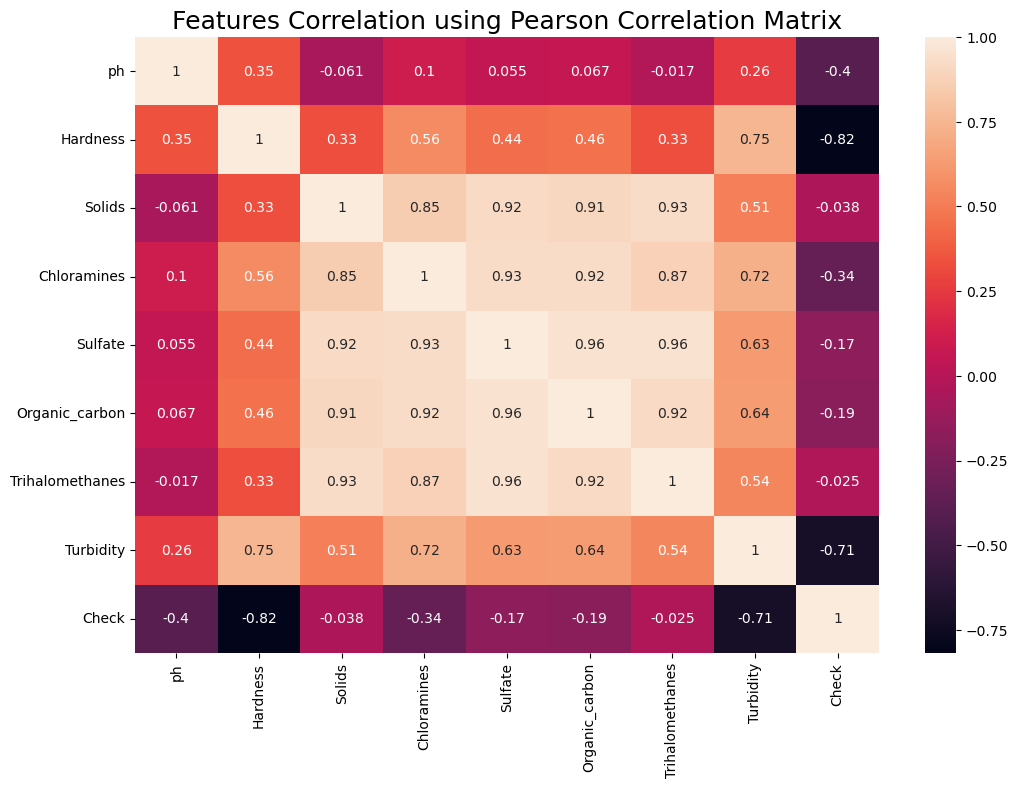

In [15]:
plt.figure(figsize=(12,8))
plt.title("Features Correlation using Pearson Correlation Matrix", fontsize=18)
sns.heatmap(corr_pearson, annot=True)

### FOR SPEARMAN'S CORRELATION MATRIX

<Axes: title={'center': "Features Correlation using Spearman's Correlation Matrix"}>

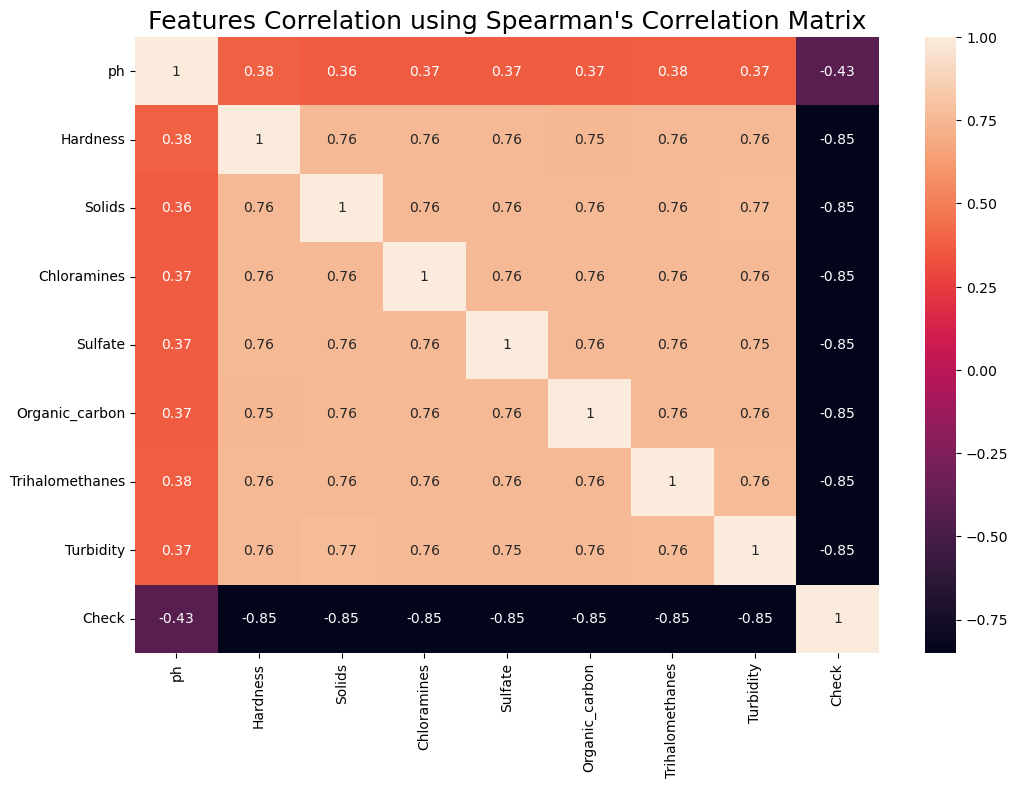

In [16]:
plt.figure(figsize=(12,8))
plt.title("Features Correlation using Spearman's Correlation Matrix", fontsize=18)
sns.heatmap(corr_spearman, annot=True)

### FOR KENDALL'S TAU CORRELATION MATRIX

<Axes: title={'center': "Features Correlation using Kendall's Tau Correlation Matrix"}>

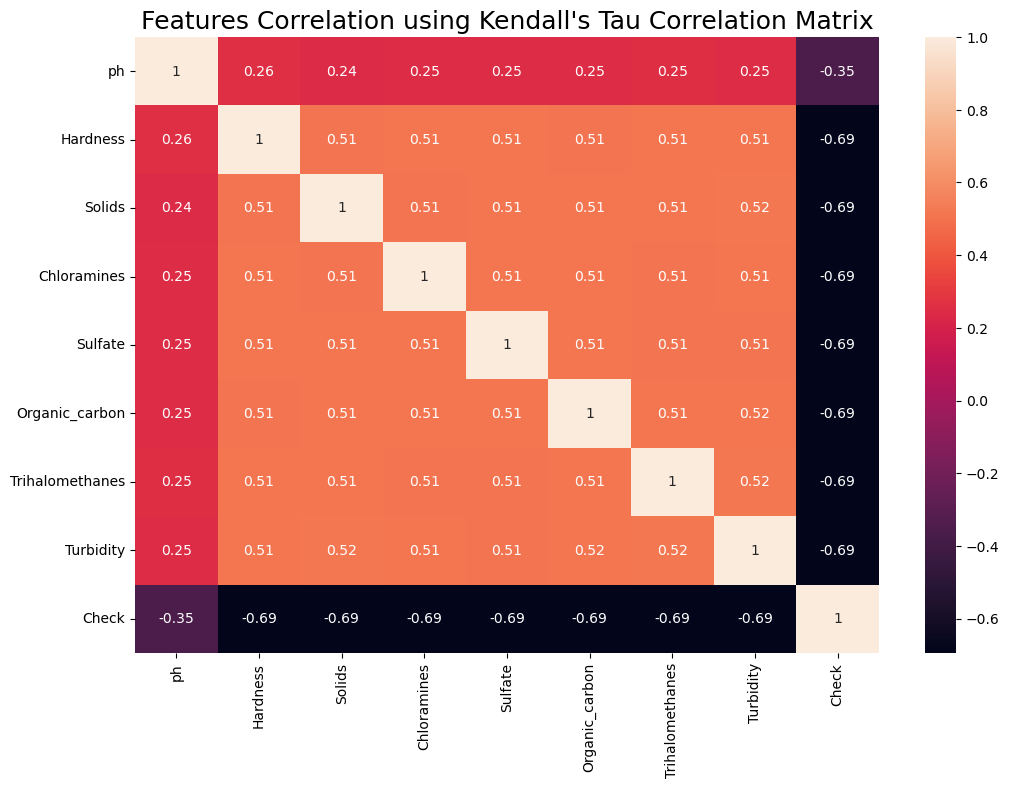

In [17]:
plt.figure(figsize=(12,8))
plt.title("Features Correlation using Kendall's Tau Correlation Matrix", fontsize=18)
sns.heatmap(corr_kendall, annot=True)

### Correlation with Target Column

Correlation of features with target:
 Trihalomethanes   -0.024508
Solids            -0.038136
Sulfate           -0.167973
Organic_carbon    -0.189228
Chloramines       -0.340650
ph                -0.396380
Turbidity         -0.708264
Hardness          -0.817597
Name: Check, dtype: float64


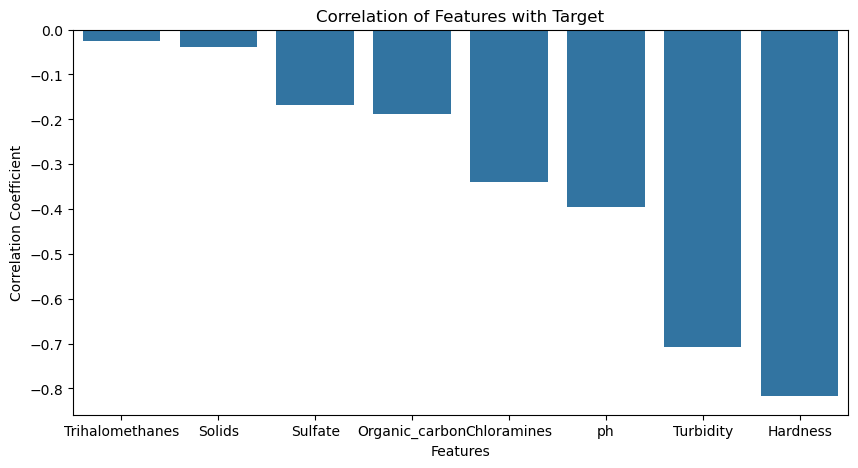

In [18]:
# Get the correlation of each feature with the target column
target_correlation = corr_pearson['Check'].sort_values(ascending=False)

# Drop the target itself from the correlation results
target_correlation = target_correlation.drop('Check')

print("Correlation of features with target:\n", target_correlation)

# Plot the correlations
plt.figure(figsize=(10, 5))
sns.barplot(x=target_correlation.index, y=target_correlation.values)
plt.title('Correlation of Features with Target')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

## HISTOGRAM FOR UNIVARIATE ANALYSIS

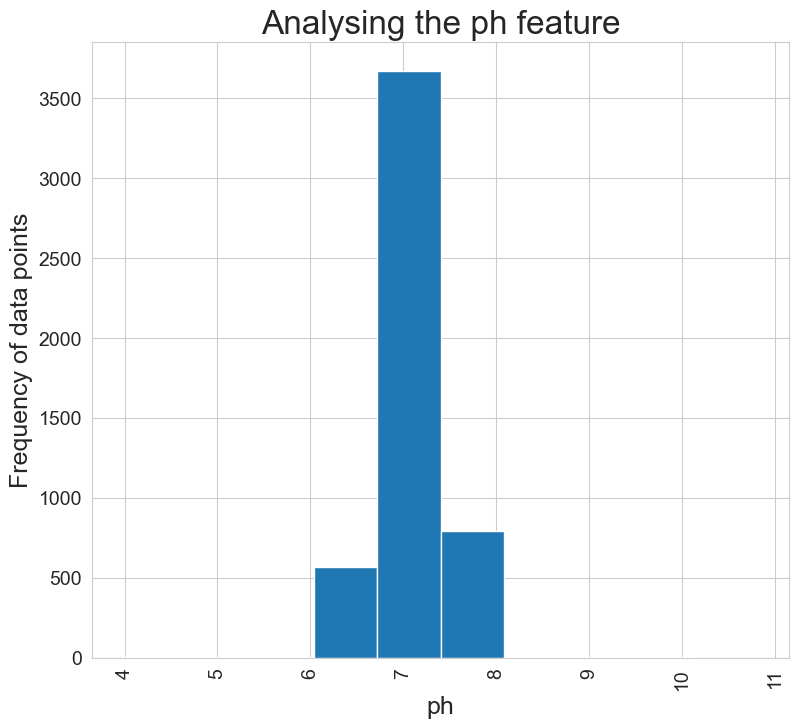

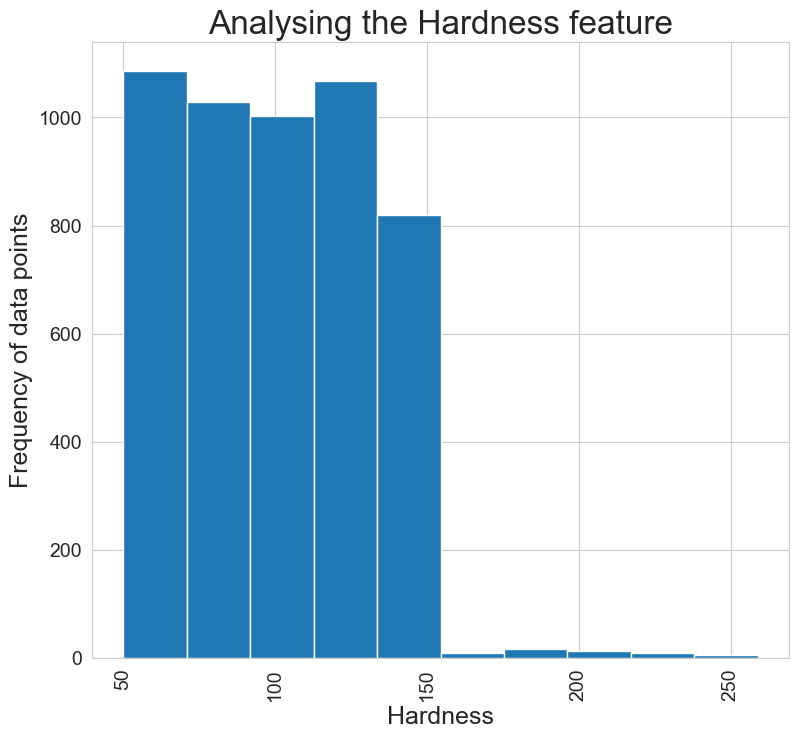

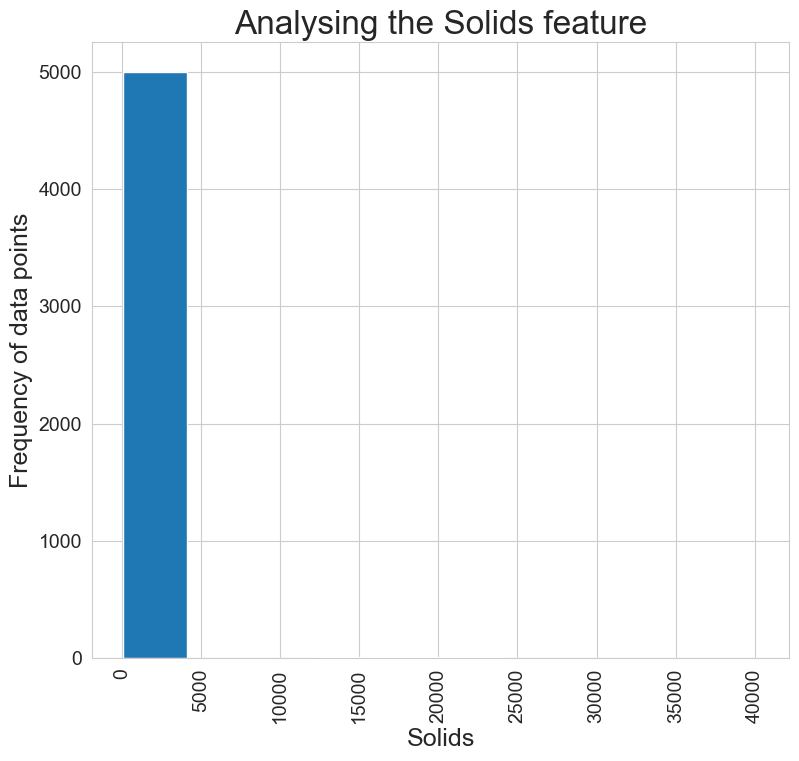

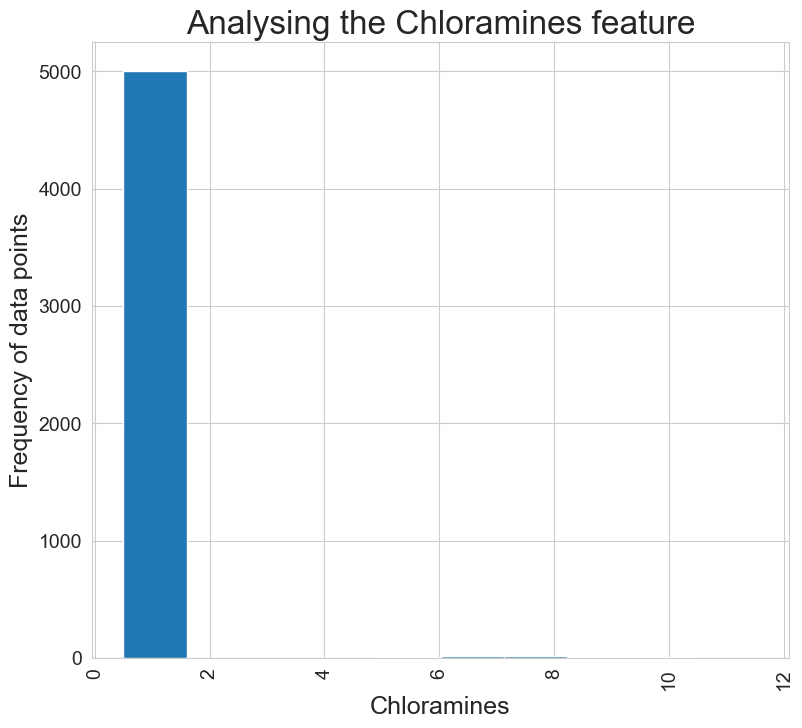

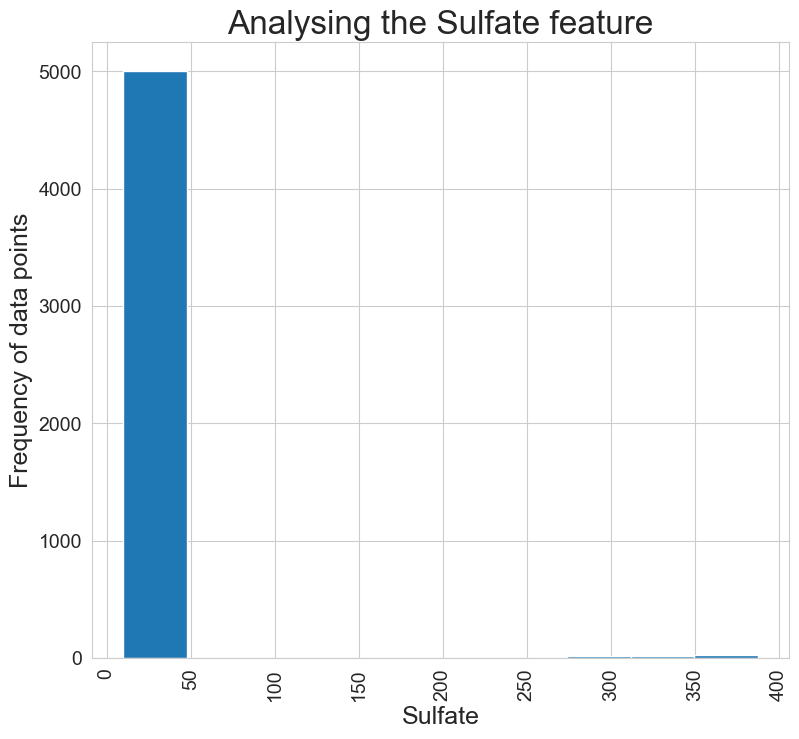

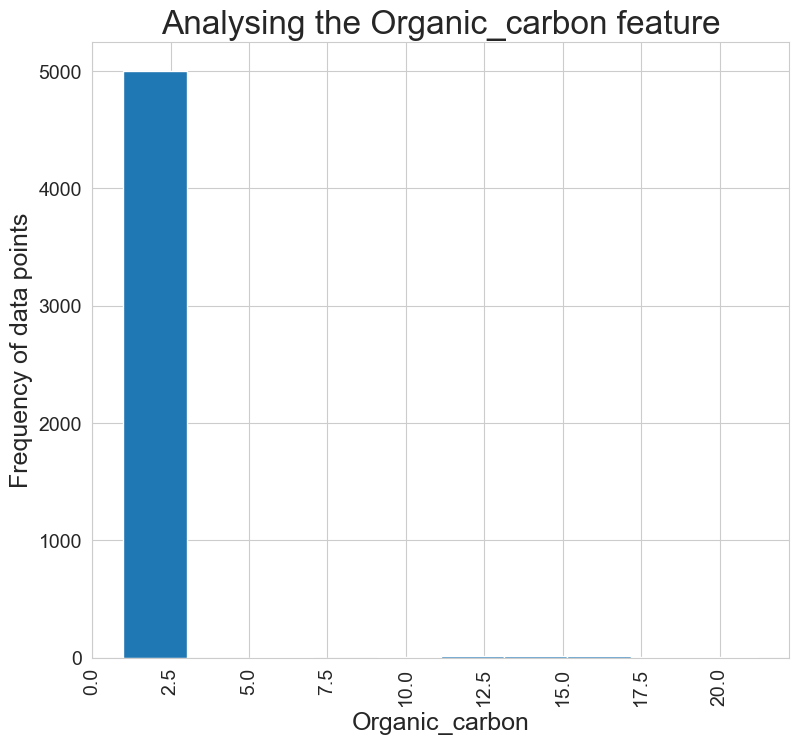

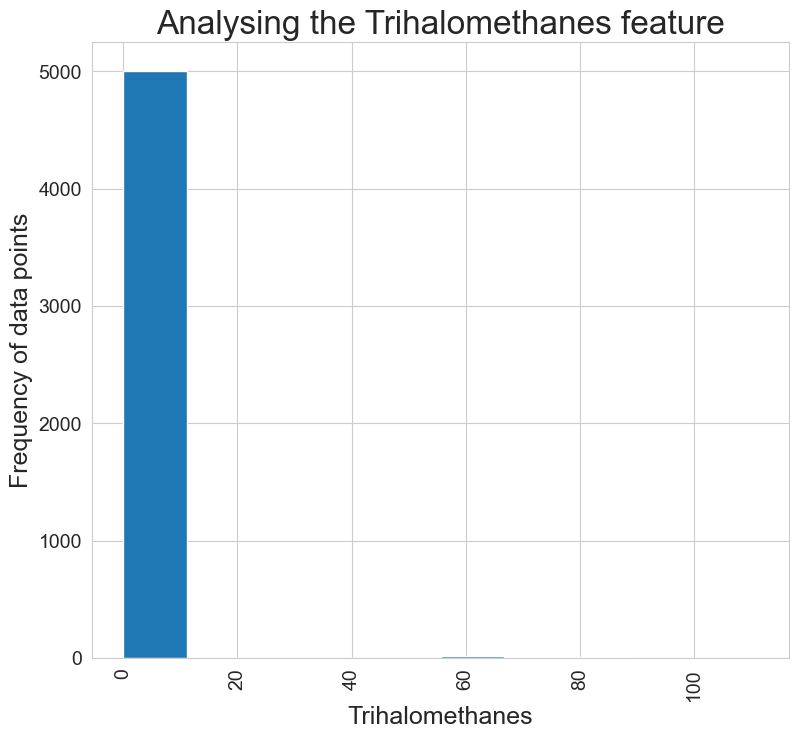

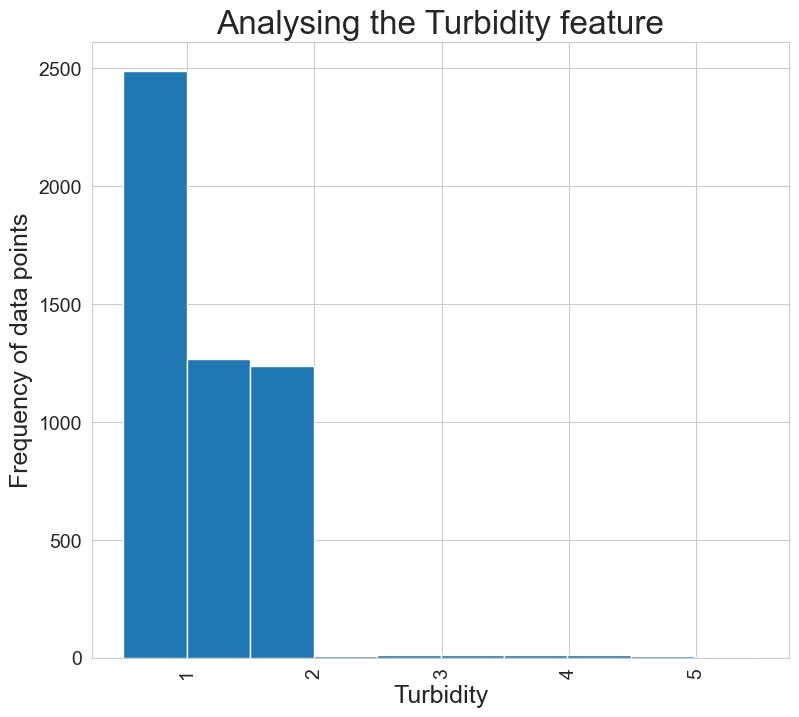

In [19]:
for x in selected_features:
    ax = sns.set_style('whitegrid')
    plt.subplots(figsize=(9,8))
    plt.hist(df[x])
    plt.xticks(rotation=90, fontsize=14)
    plt.yticks(rotation=0, fontsize=14)
    plt.title("Analysing the " + str(x) + " feature" ,fontsize = 24)
    plt.xlabel(str(x), fontsize = 18)
    plt.ylabel("Frequency of data points", fontsize = 18)

## DISTPLOT AND PROBABILITY PLOT FOR UNIVARIATE ANALYSIS

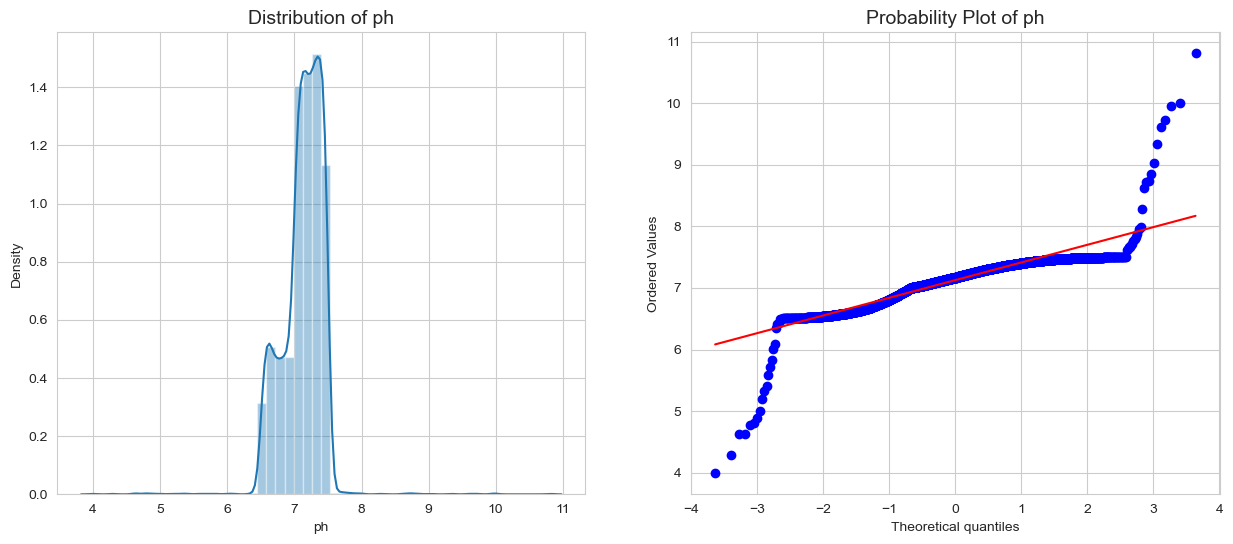

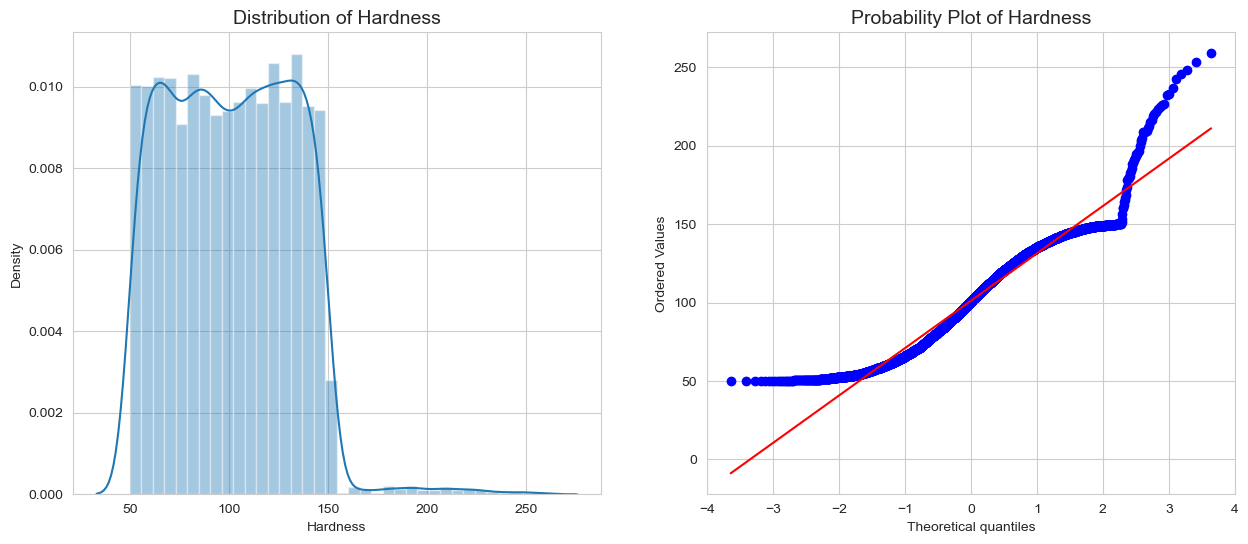

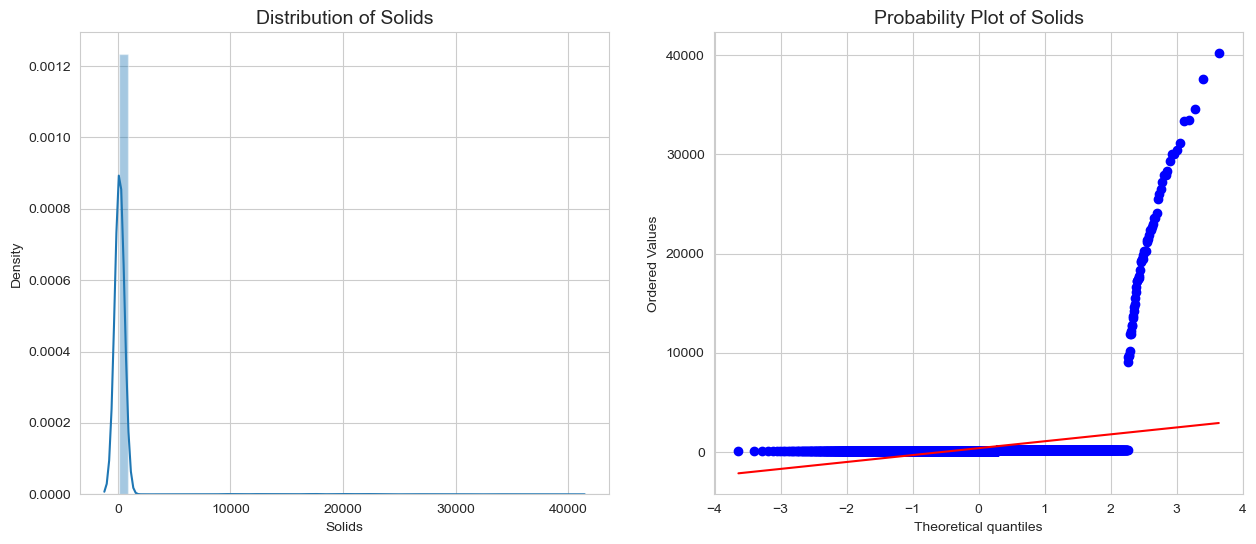

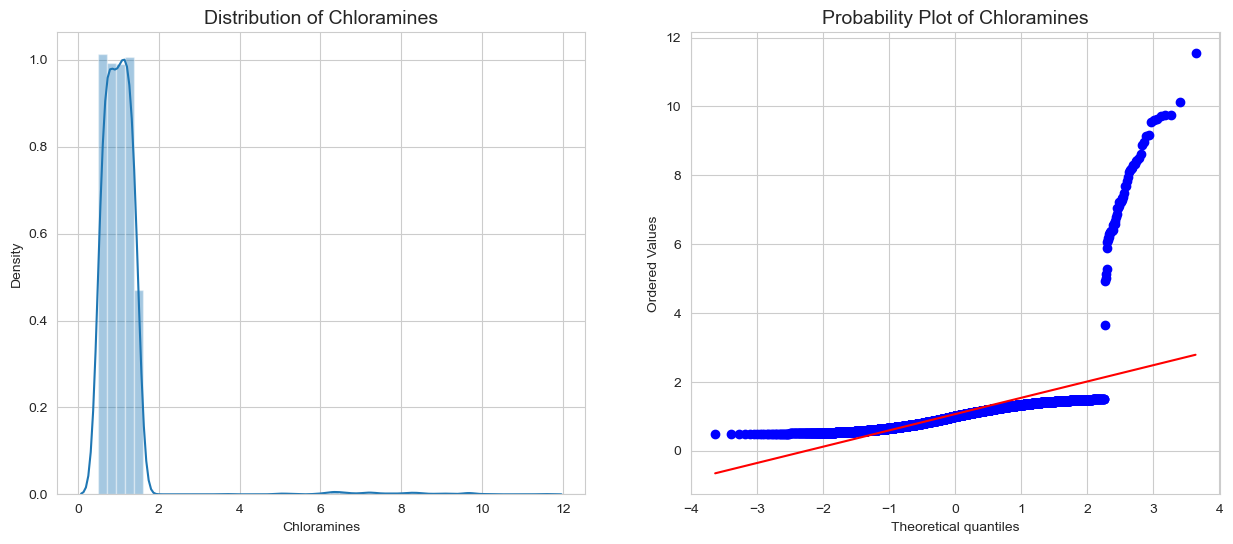

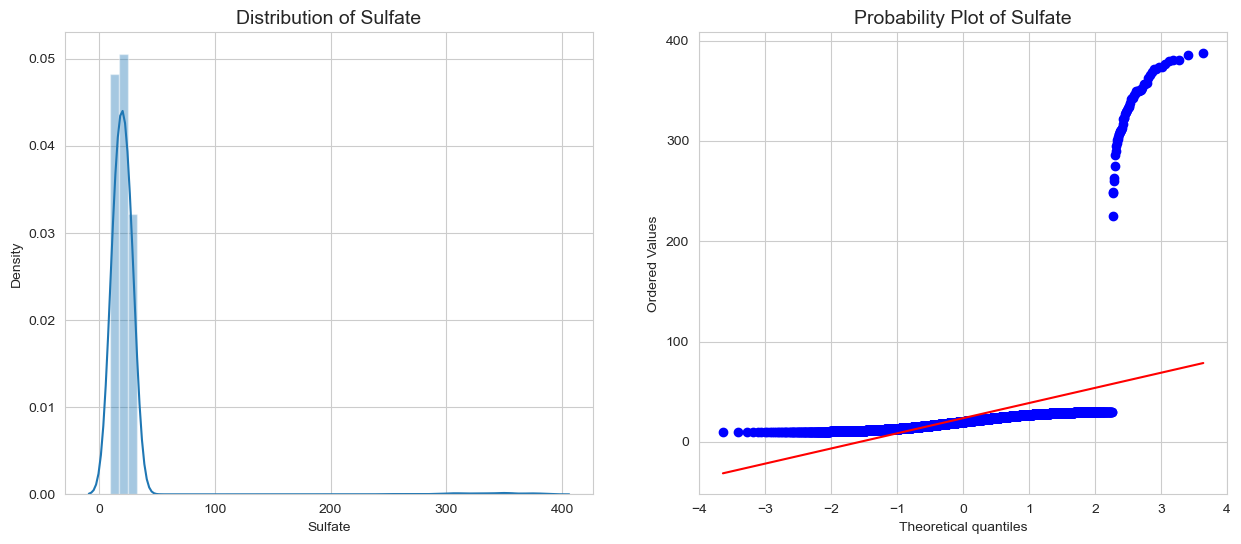

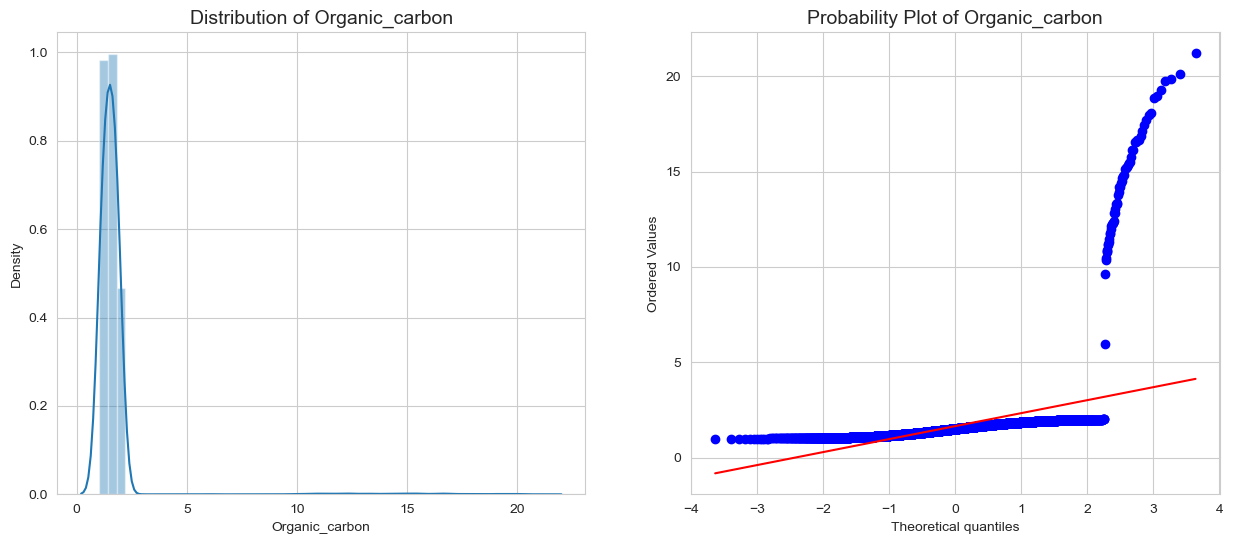

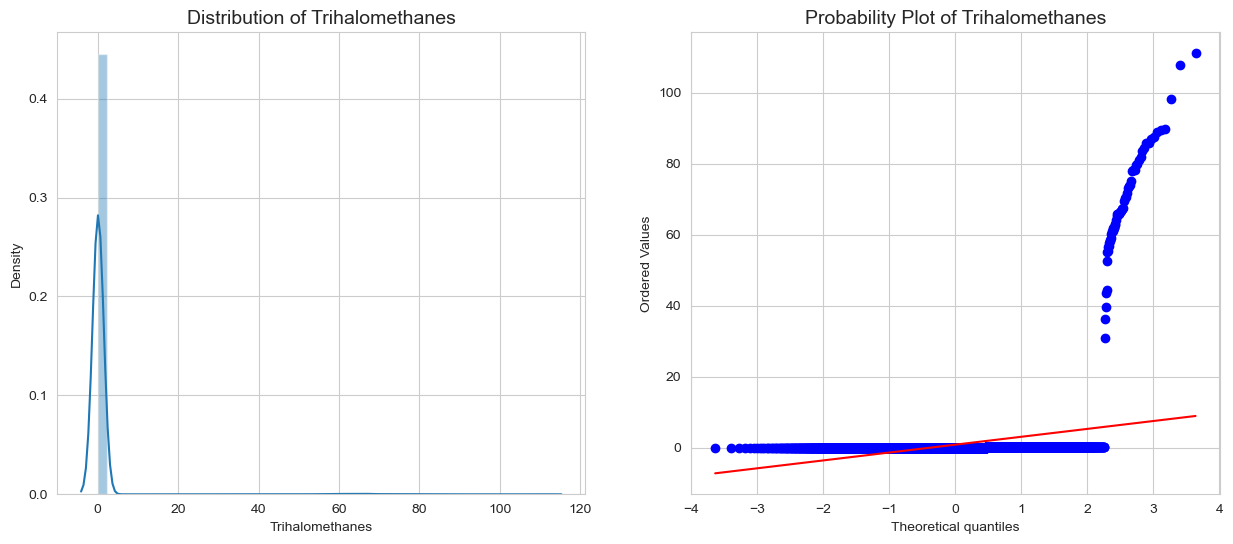

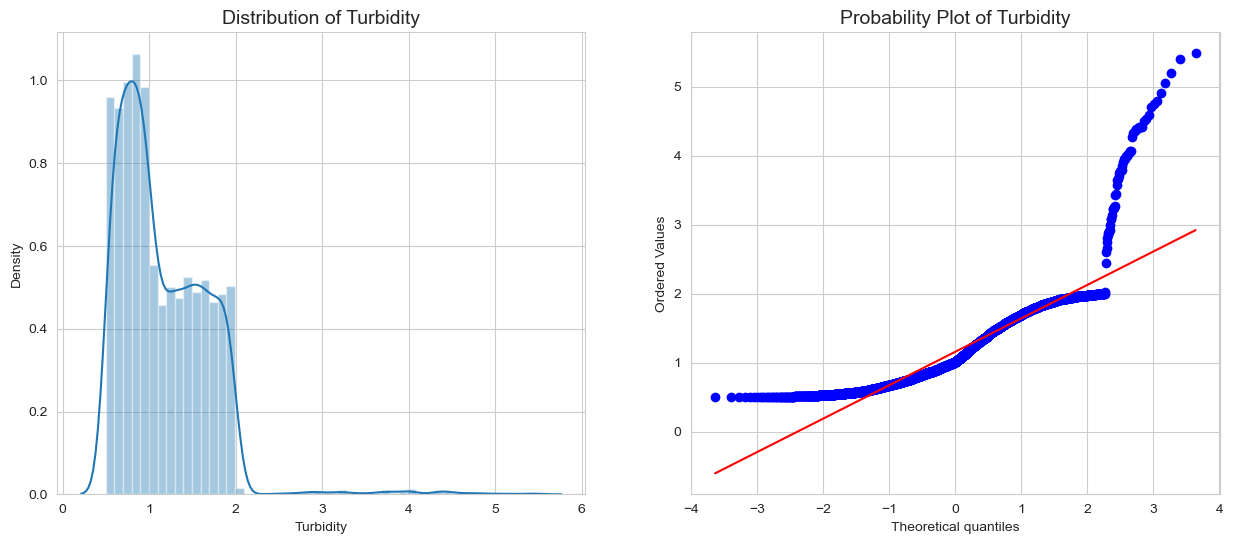

In [20]:
for x in selected_features:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot the distribution (distplot) on the first subplot
    sns.set_style('whitegrid')
    sns.distplot(df[x], ax=axes[0])
    axes[0].set_title("Distribution of " + x, fontsize=14)
    
    # Plot the Probability plot on the second subplot
    stats.probplot(df[x], dist="norm", plot=axes[1])
    axes[1].set_title("Probability Plot of " + x, fontsize=14)
    
    plt.show()


## BOXPLOT FOR STATISTIC VISUALISATION OF EACH FEATURE AND OUTLIER DETECTION

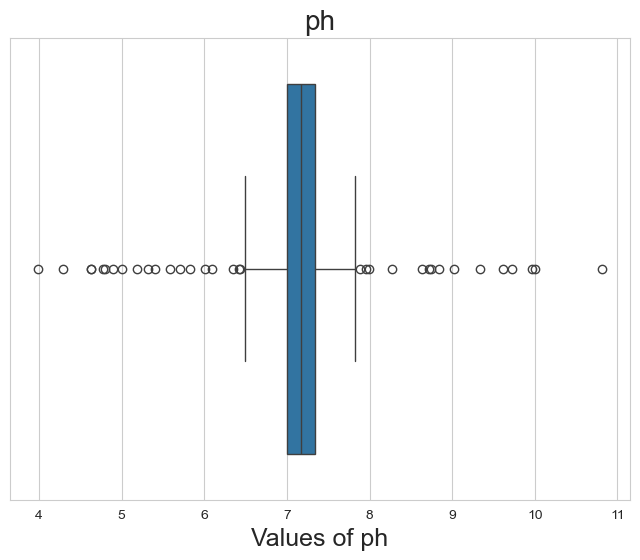

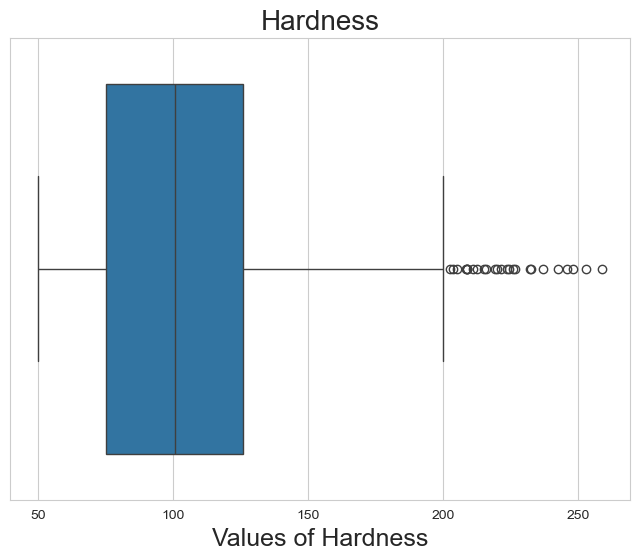

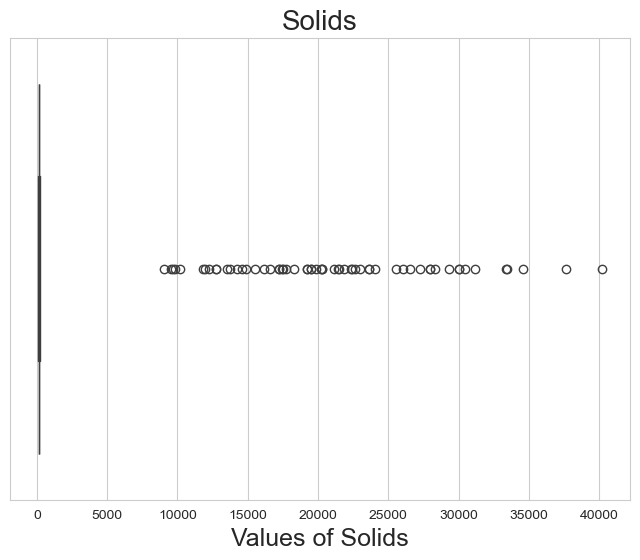

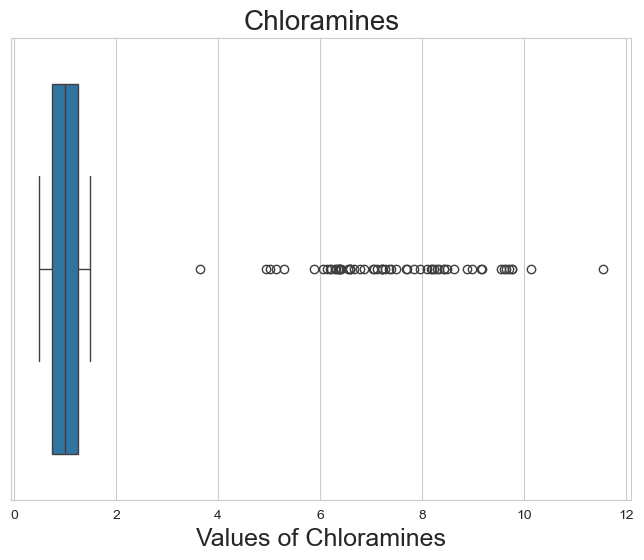

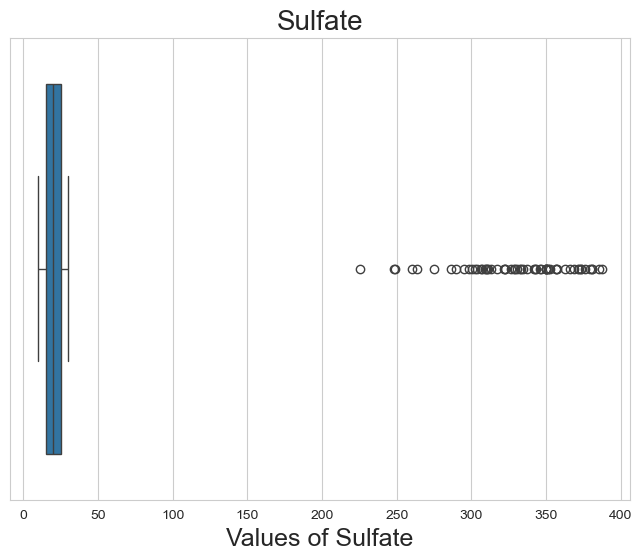

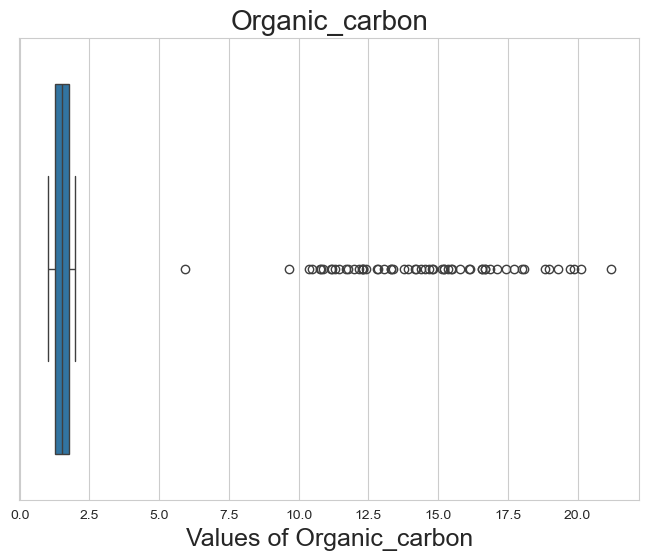

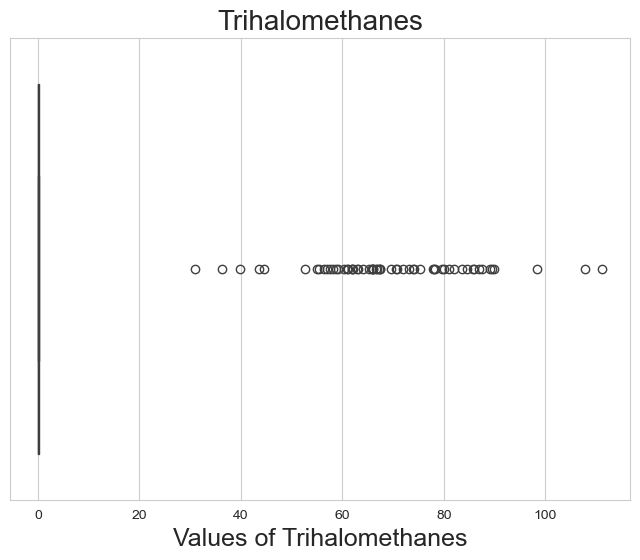

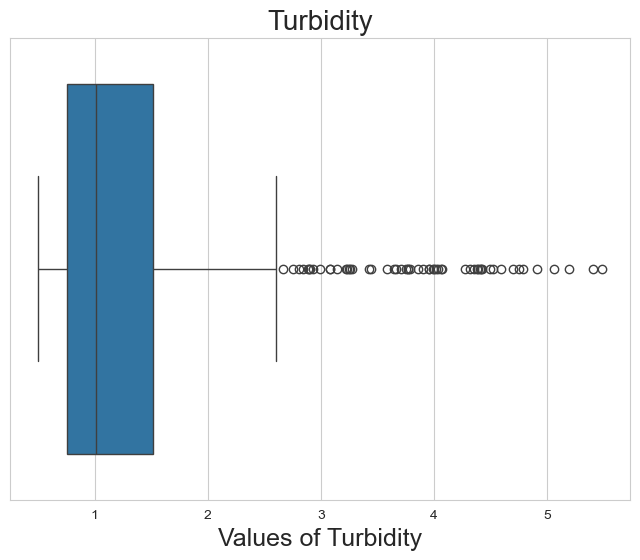

In [21]:
for x in selected_features:
    plt.figure(figsize=(8, 6))
    
    sns.set_style('whitegrid')
    sns.boxplot(x=df[x])
    
    plt.title(x, fontsize=20)
    plt.xlabel("Values of " + x, fontsize=18)
    
    plt.show()

## MULTIVARIATE ANALYSIS USING PAIRPLOT

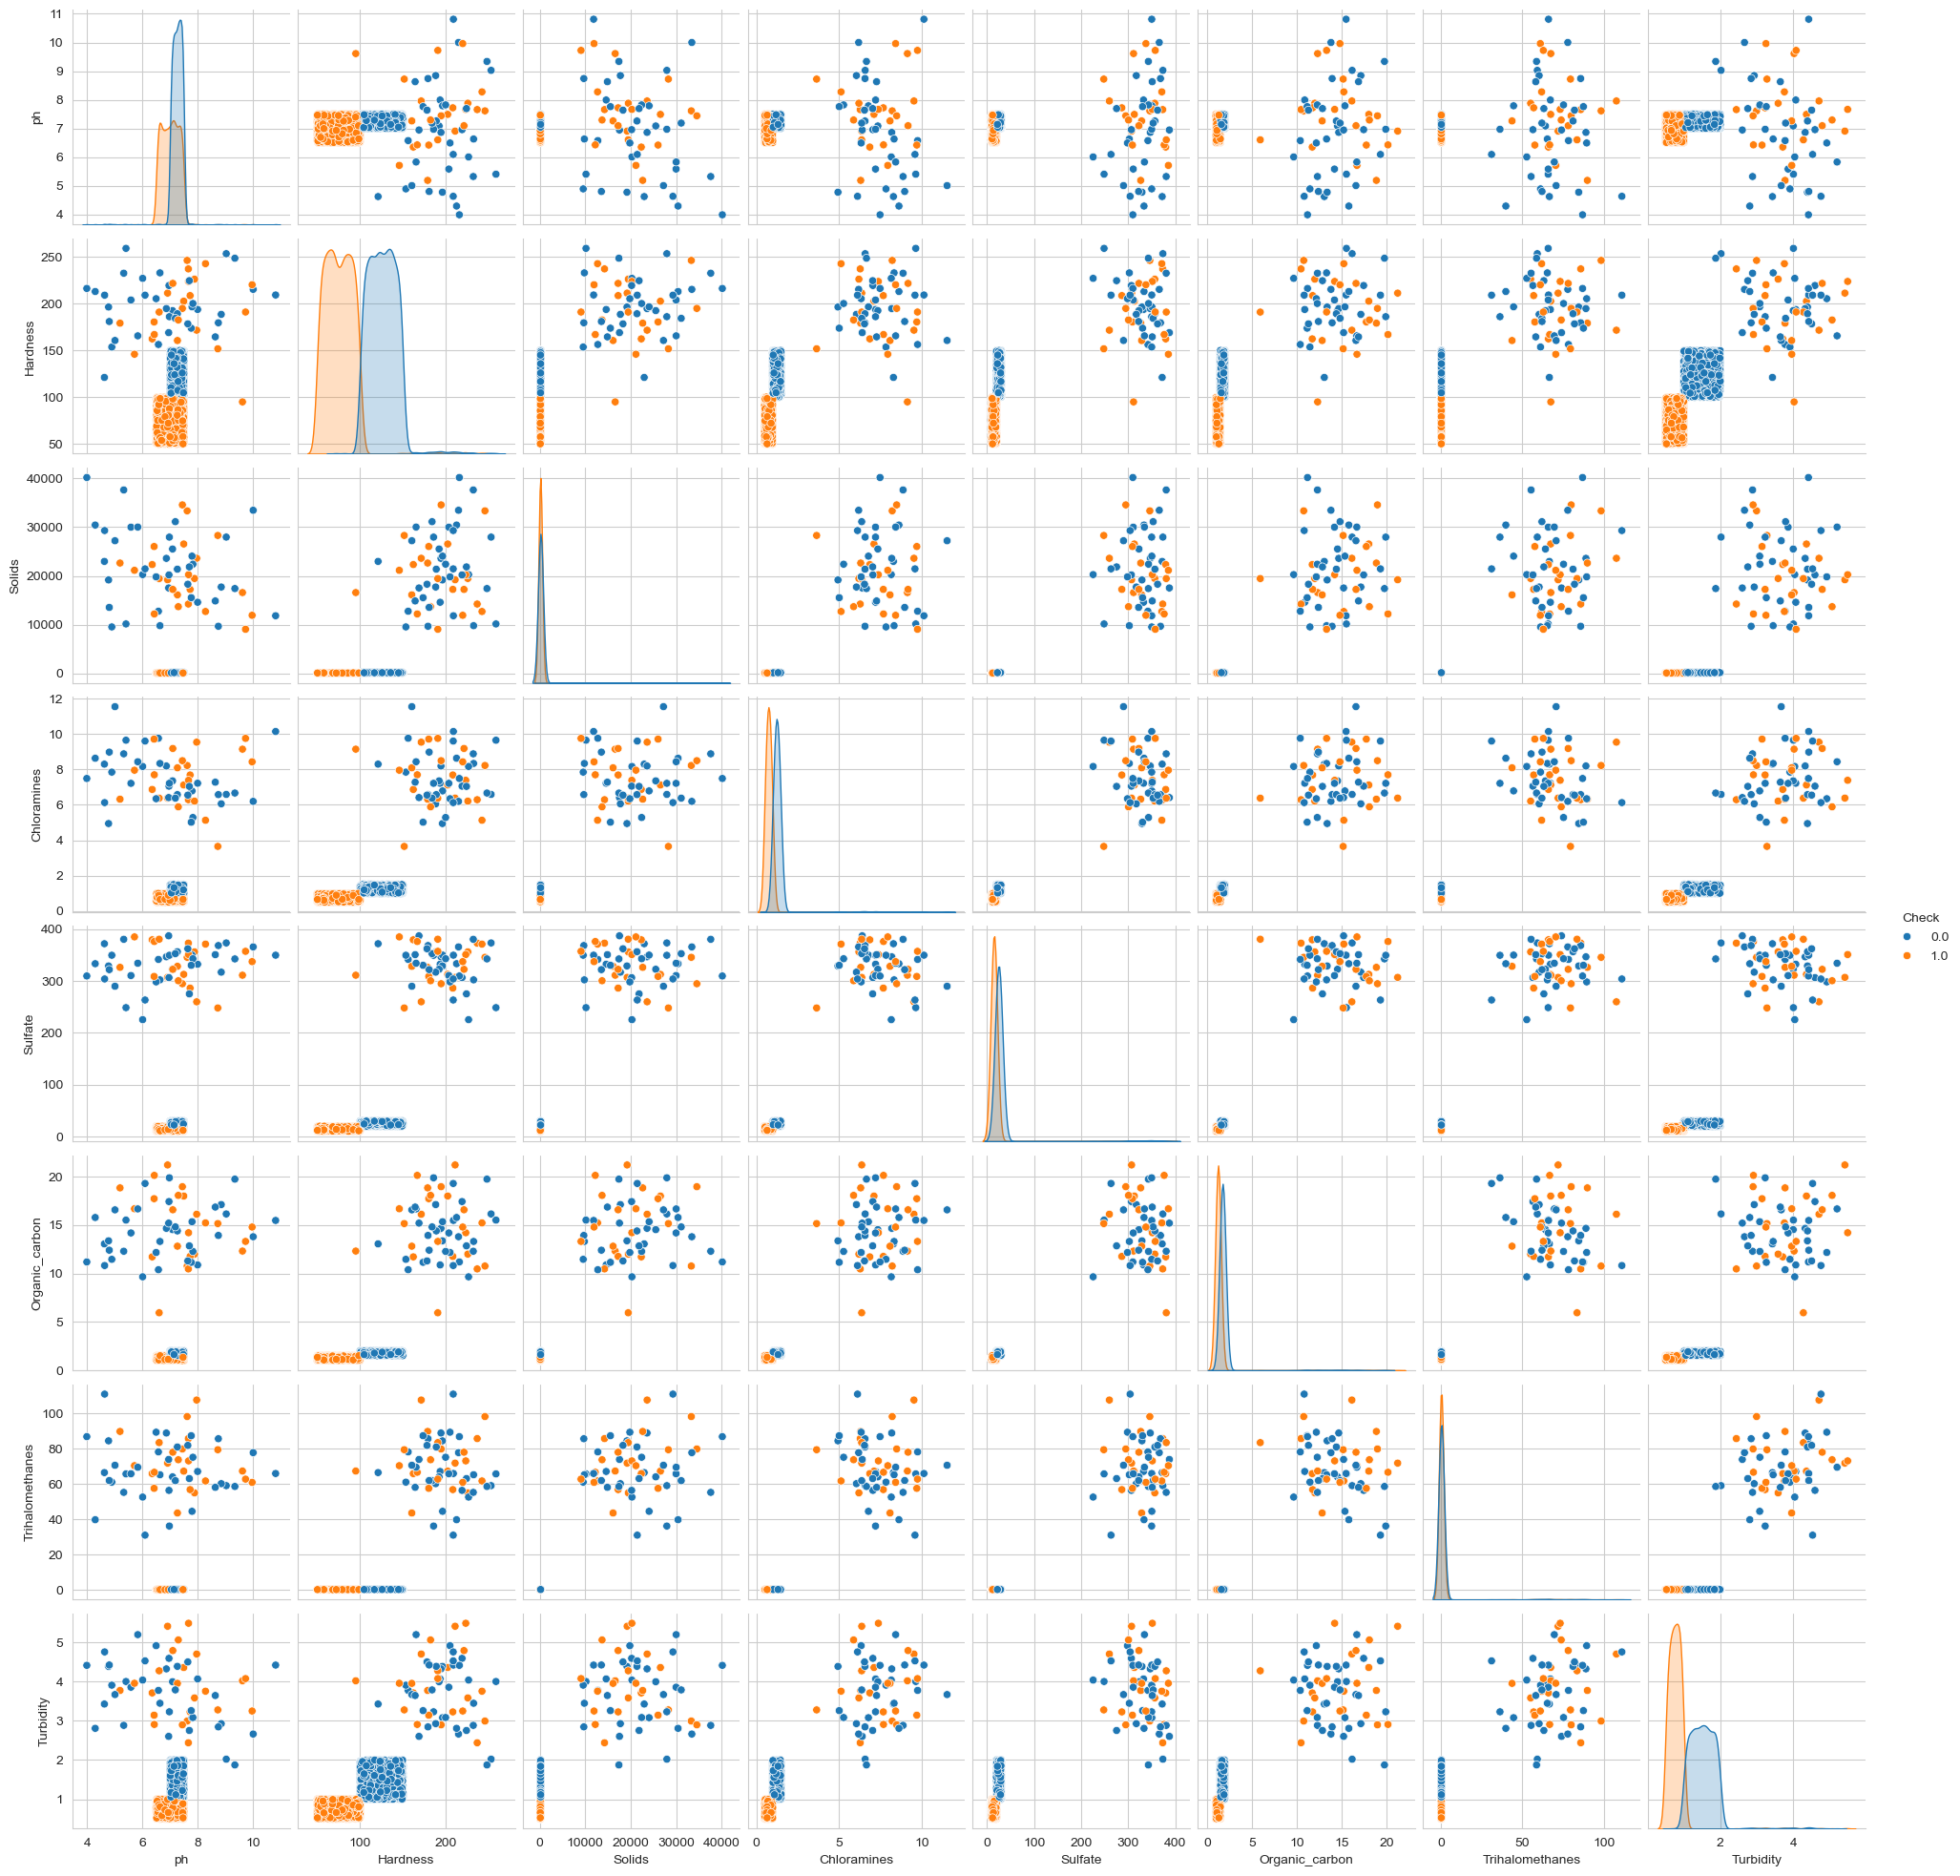

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df,hue='Check')

# Show the plot
plt.show()


## OUTLIER TREATMENT

In [23]:
for x in selected_features:
    # Finding the IQR
    percentile25 = df[x].quantile(0.25)
    percentile75 = df[x].quantile(0.75)
    iqr = percentile75 - percentile25
    
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    # Capping the outliers
    
    df[x] = np.where(
        df[x] > upper_limit,
        upper_limit,
        np.where(
            df[x] < lower_limit,
            lower_limit,
            df[x]
        )
    )

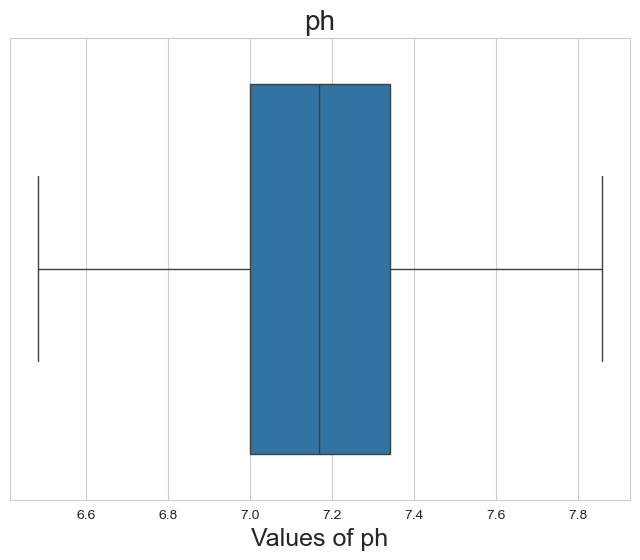

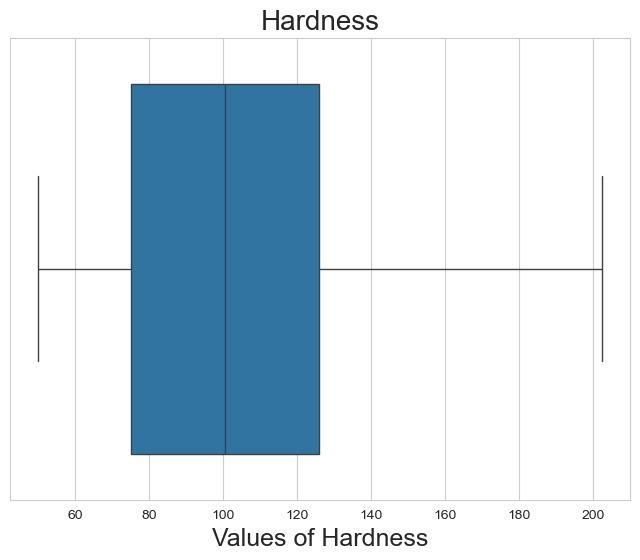

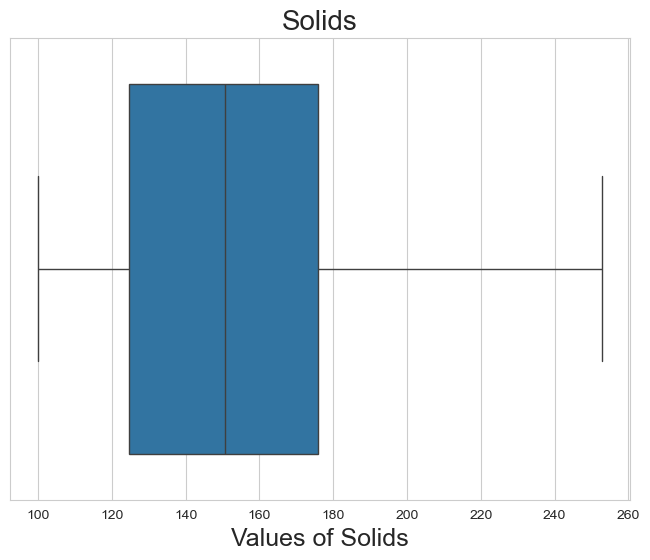

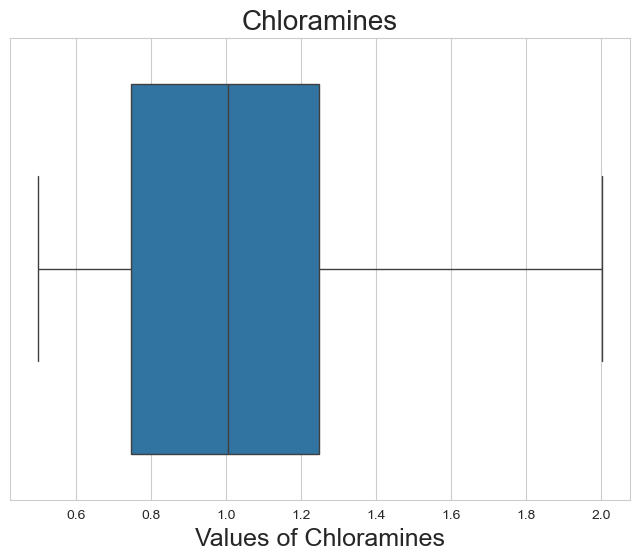

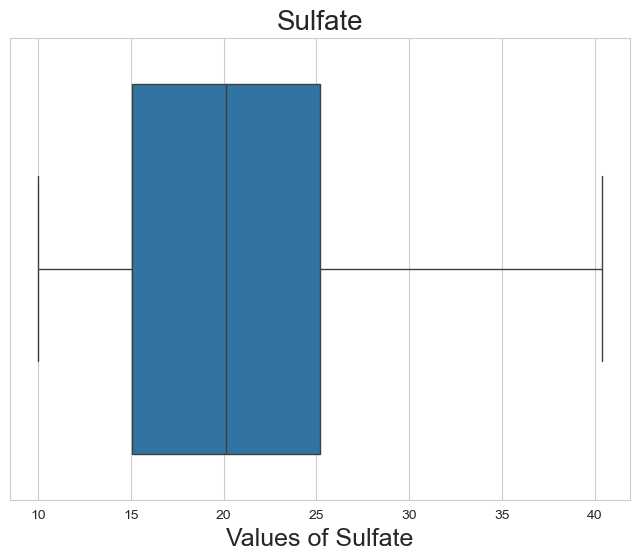

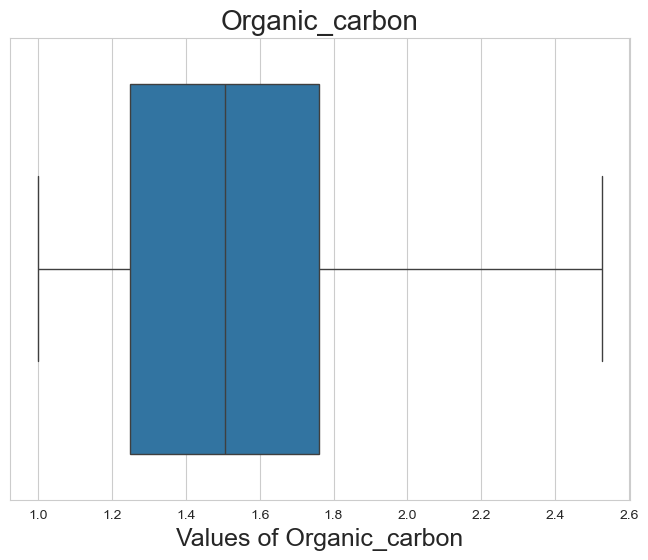

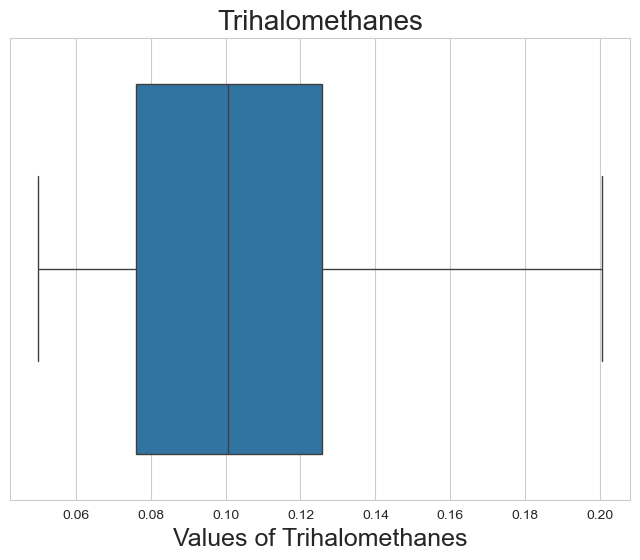

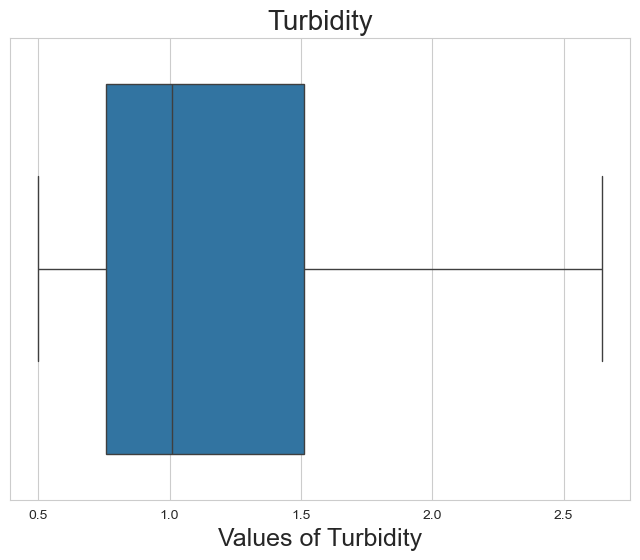

In [24]:
for x in selected_features:
    plt.figure(figsize=(8, 6))
    
    sns.set_style('whitegrid')
    sns.boxplot(x=df[x])
    
    plt.title(x, fontsize=20)
    plt.xlabel("Values of " + x, fontsize=18)
    
    plt.show()

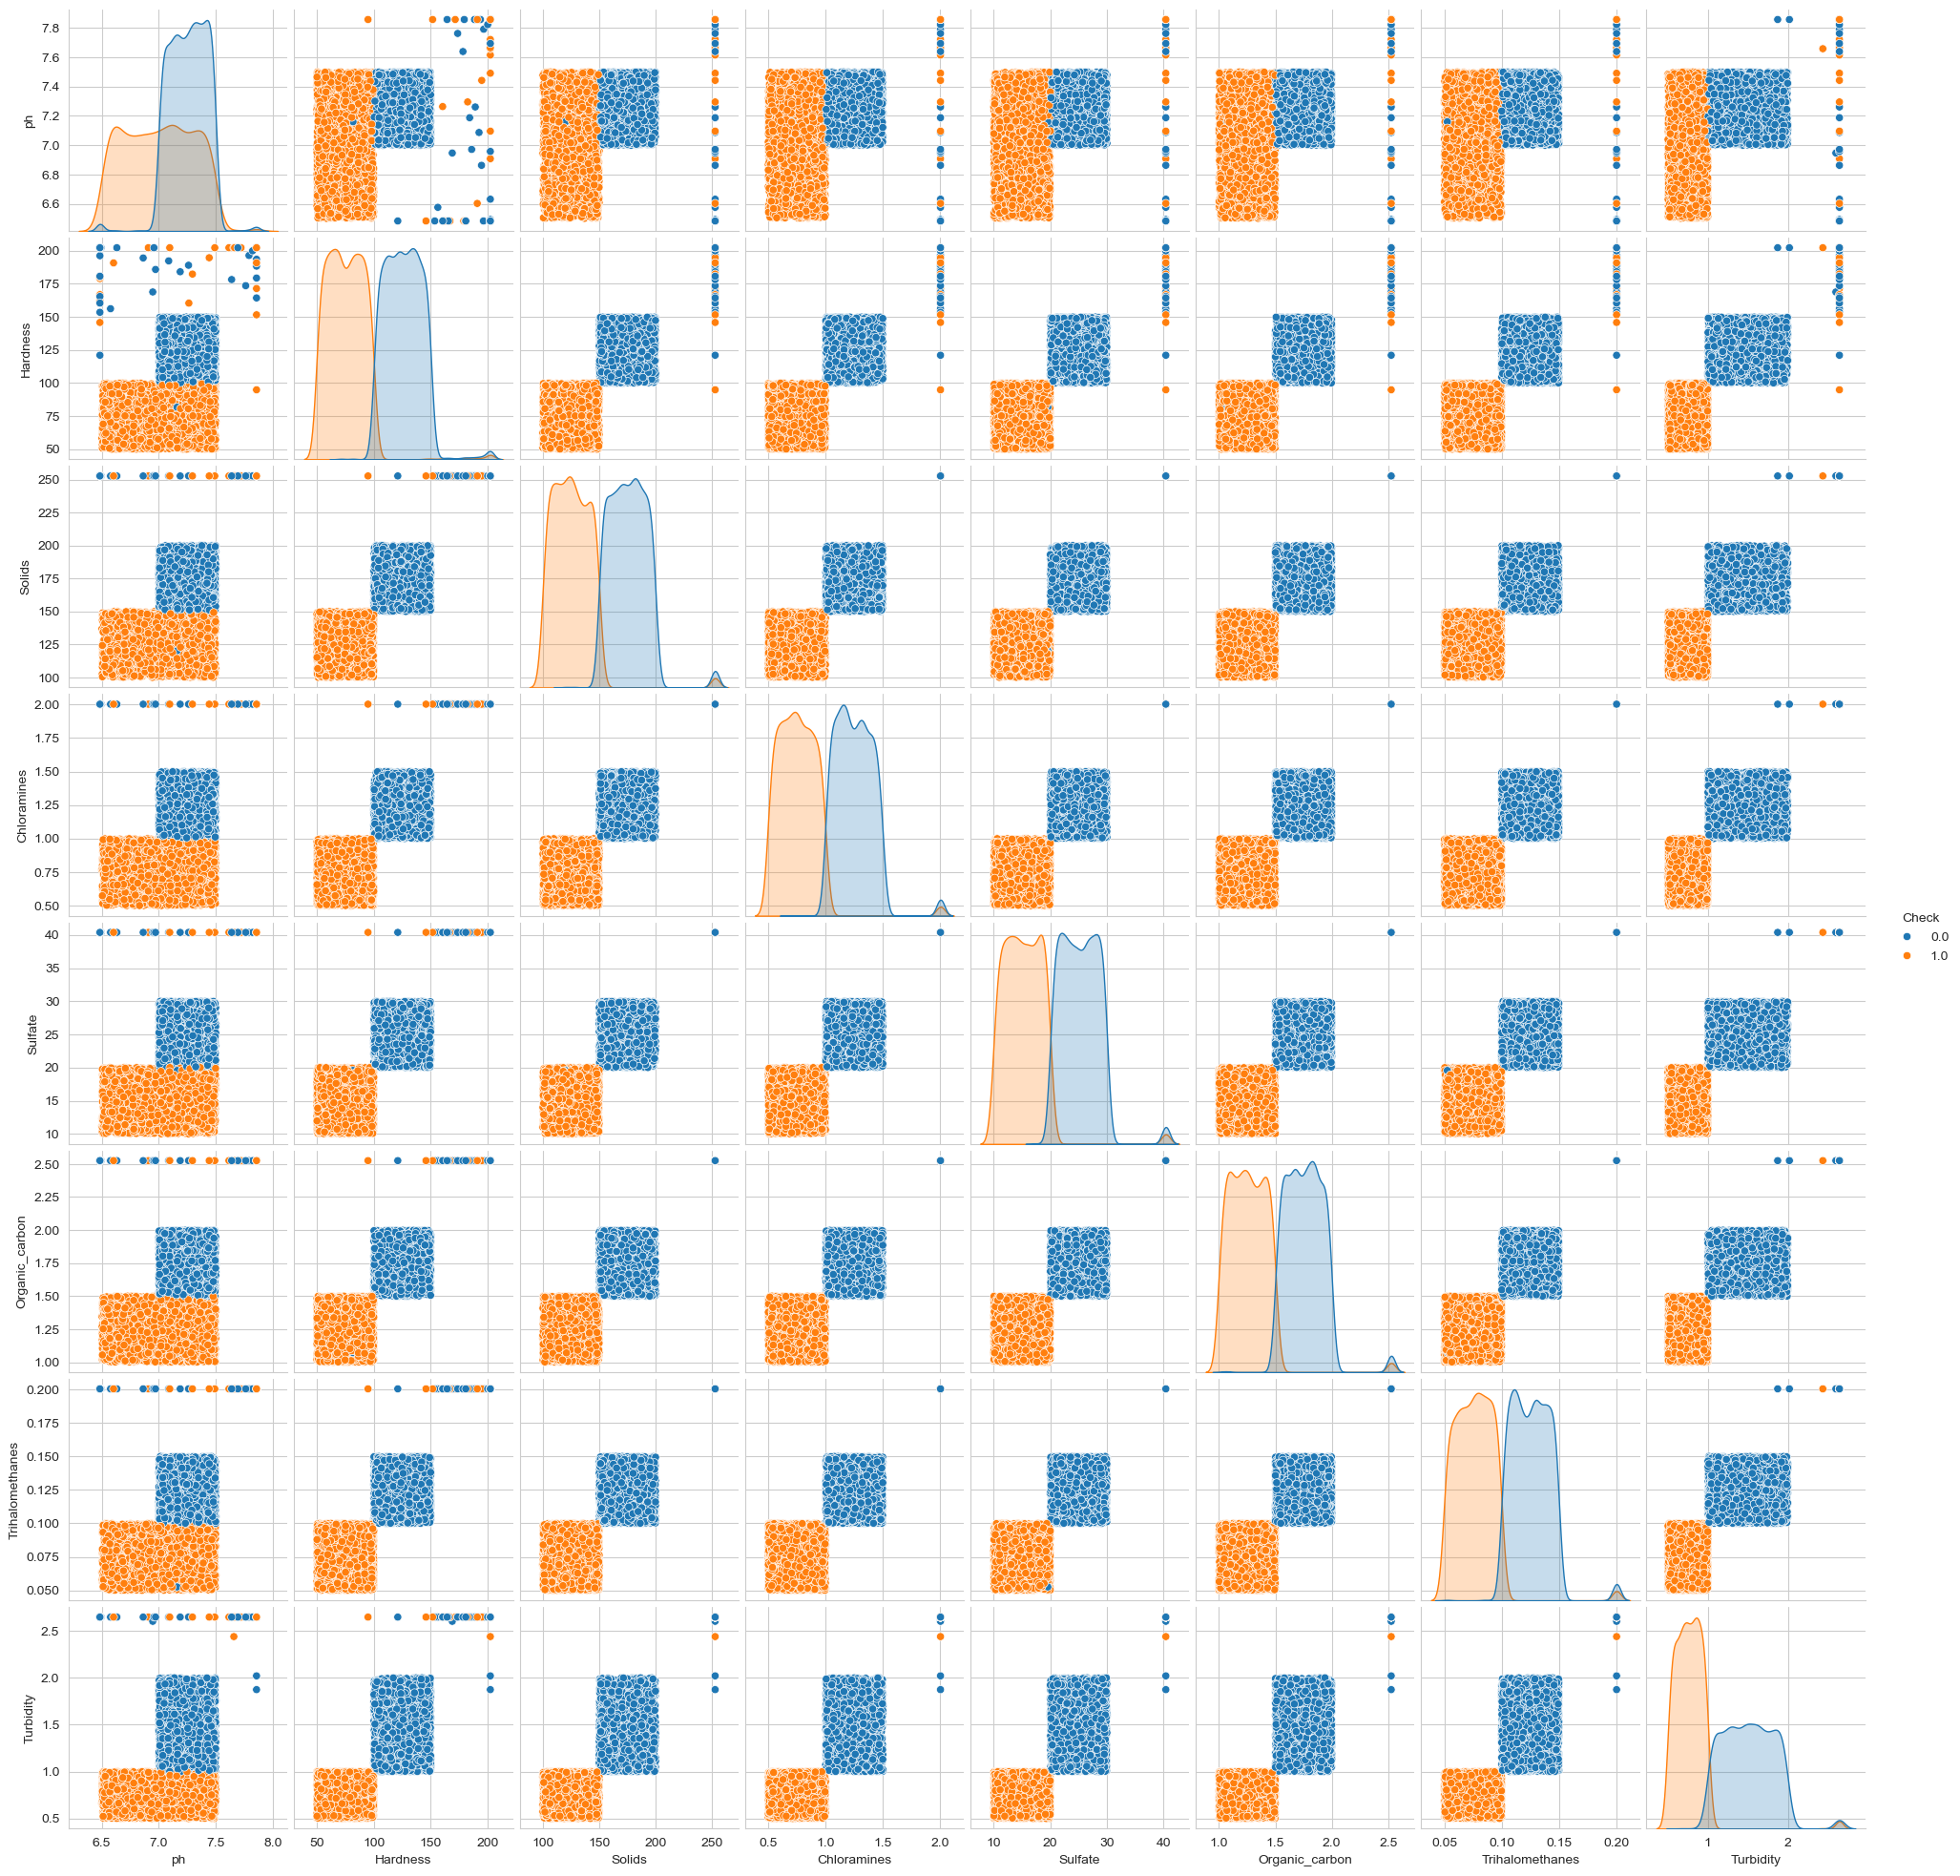

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df,hue='Check')

# Show the plot
plt.show()


## DATA TRANSFORMATION

### BEFORE TRANSFORMATION

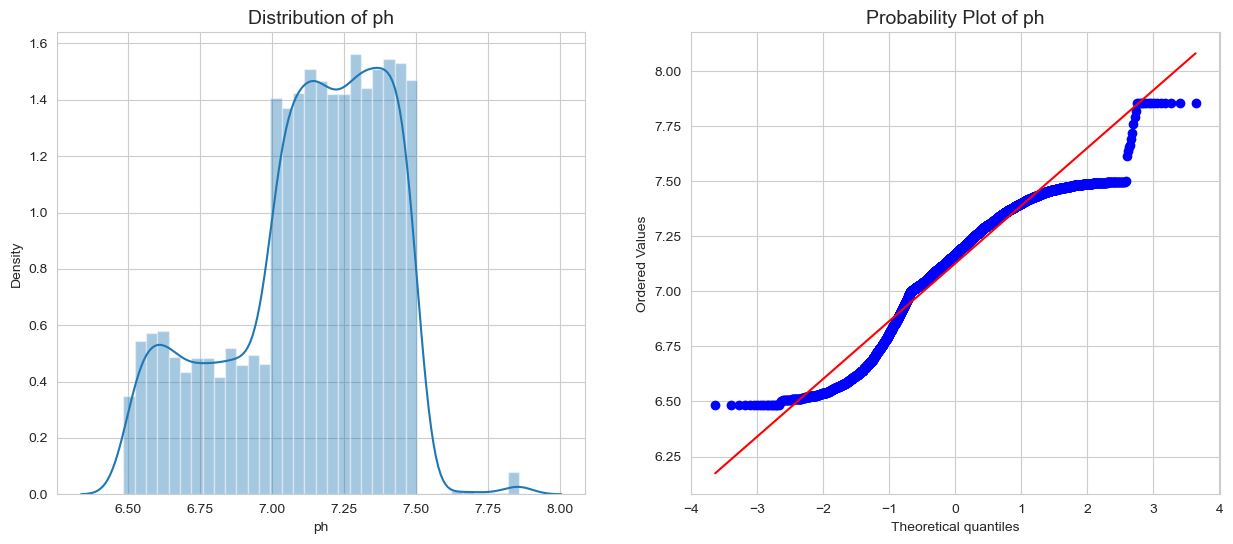

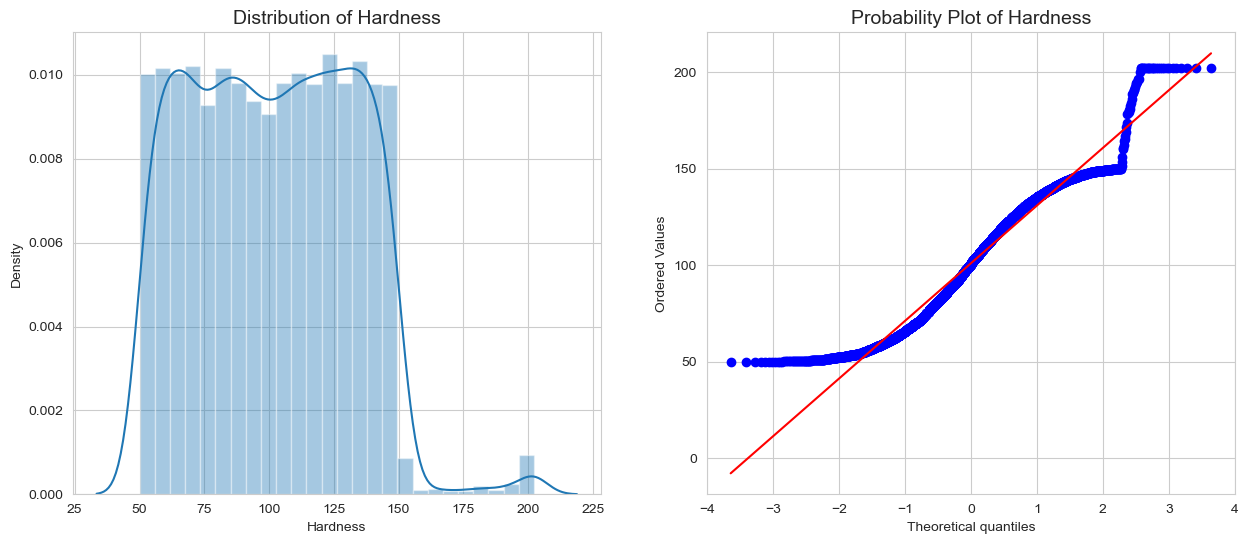

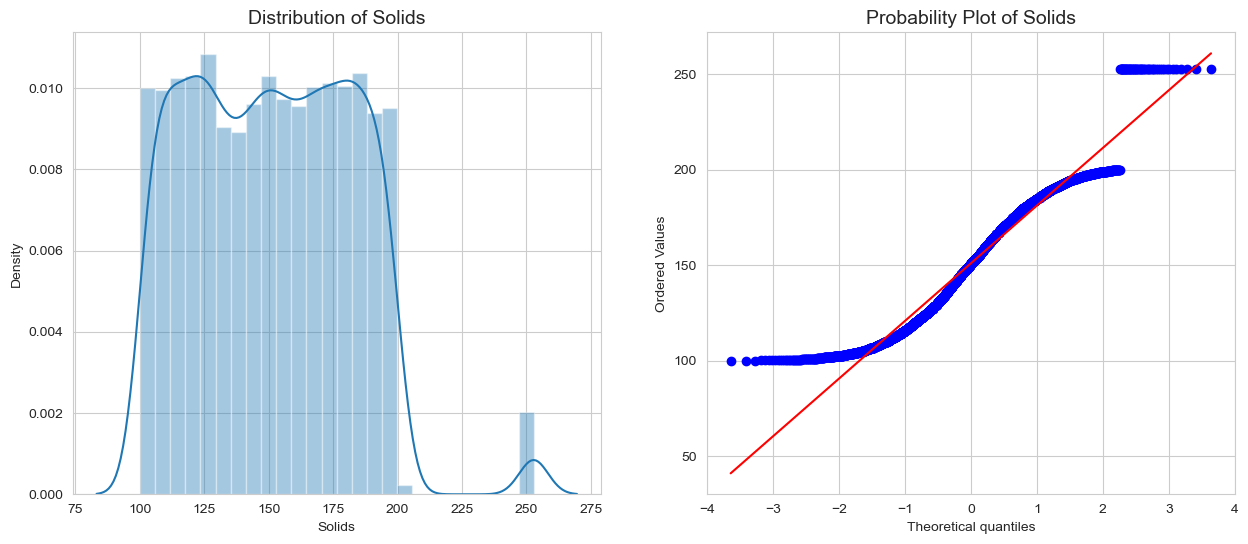

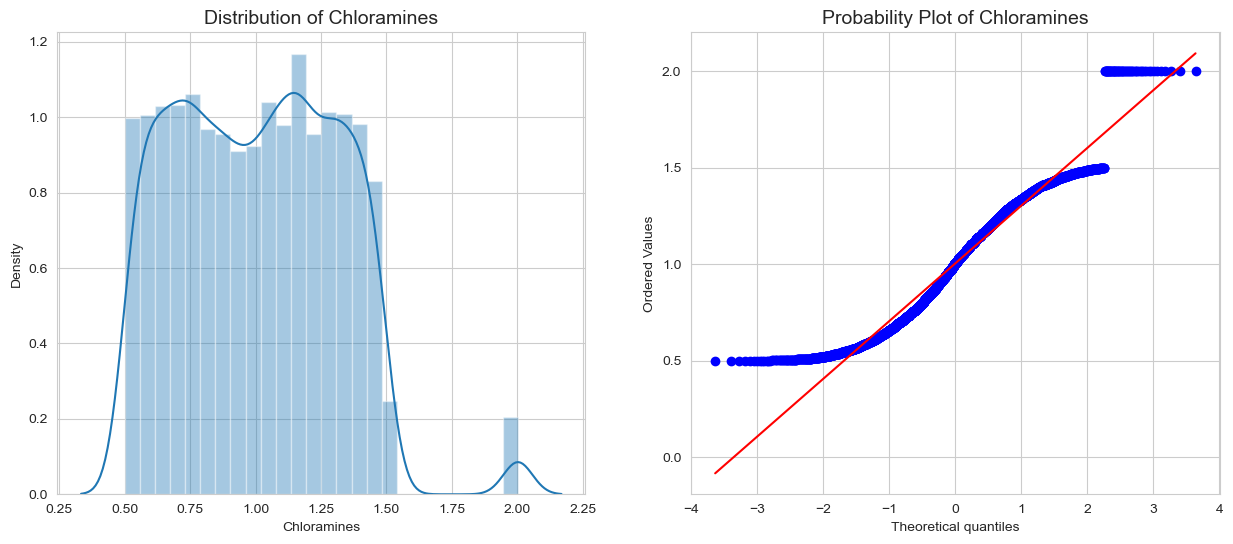

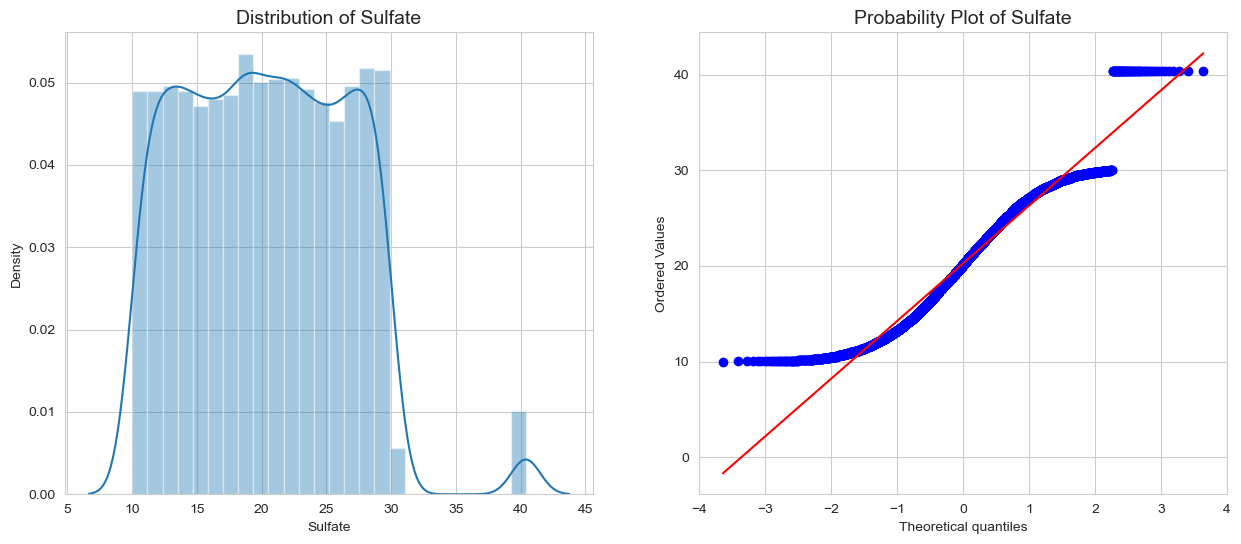

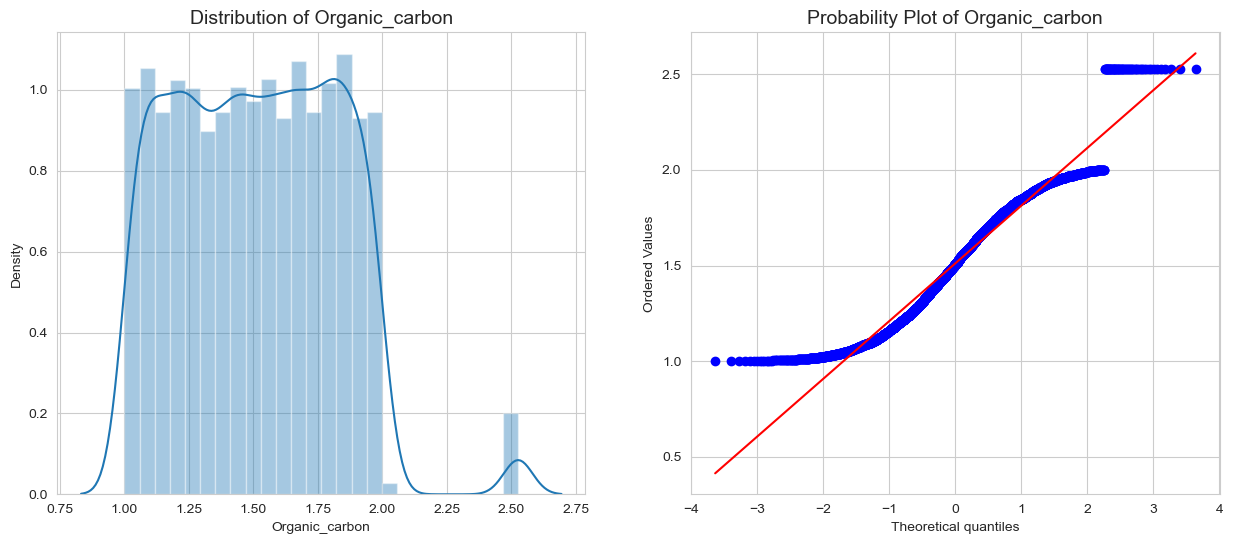

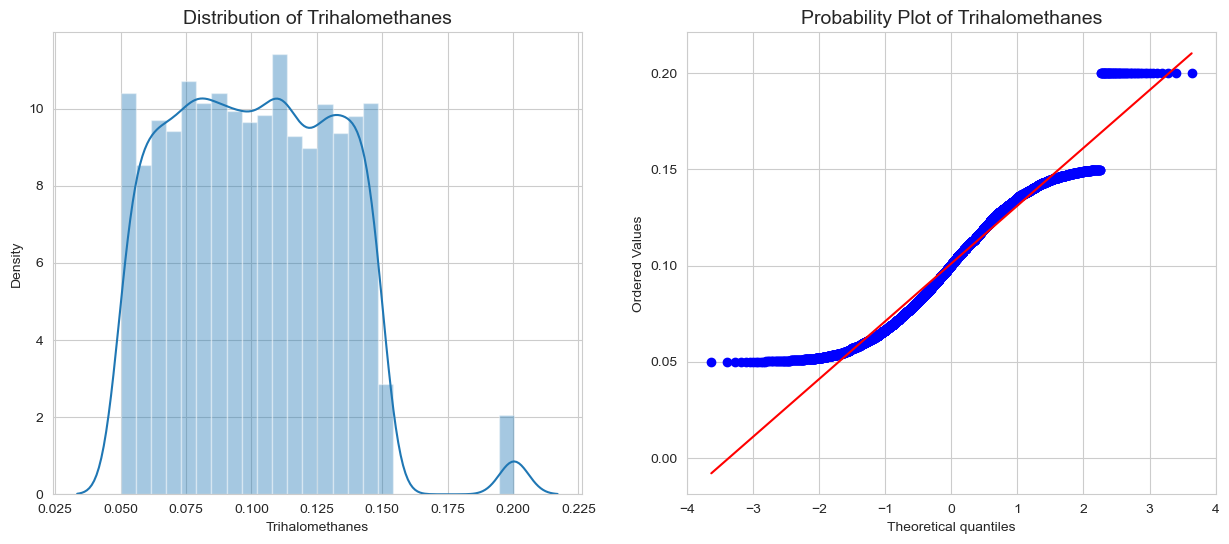

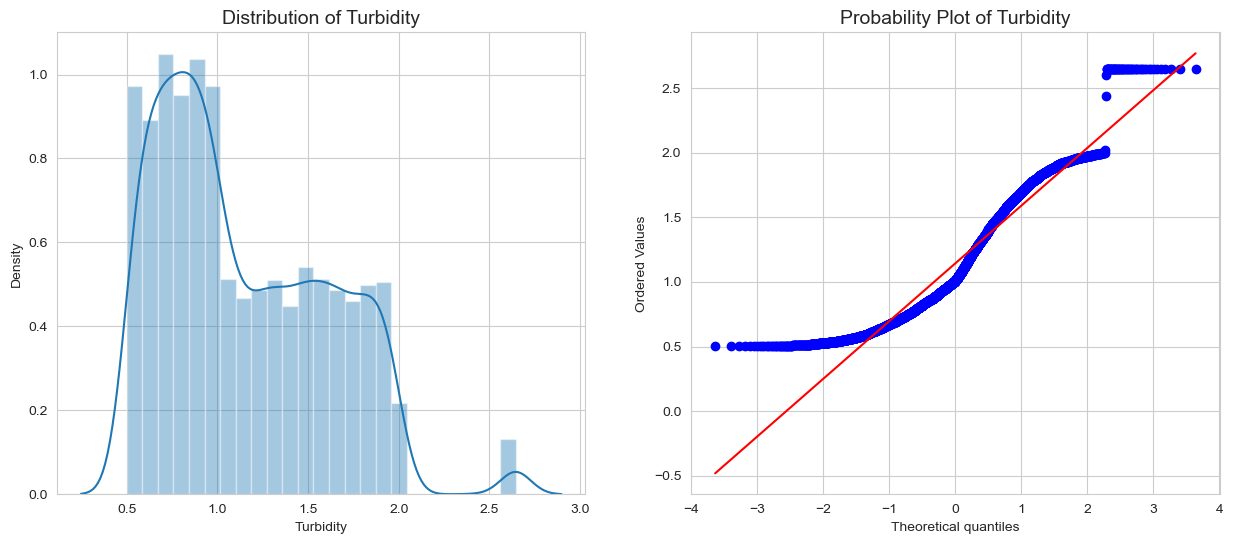

In [26]:
for x in selected_features:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot the distribution (distplot) on the first subplot
    sns.set_style('whitegrid')
    sns.distplot(df[x], ax=axes[0])
    axes[0].set_title("Distribution of " + x, fontsize=14)
    
    # Plot the Probability plot on the second subplot
    stats.probplot(df[x], dist="norm", plot=axes[1])
    axes[1].set_title("Probability Plot of " + x, fontsize=14)
    
    plt.show()

### APPLYING YEO-JOHNSON TRANSFORMATION

In [27]:
from sklearn.preprocessing import PowerTransformer

# Select numeric columns from  DataFrame
numeric_columns = df.drop(columns='Check')

# Create a PowerTransformer object using the Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')

# Fit and transform the numeric columns using the Yeo-Johnson transformation
transformed_data = pt.fit_transform(numeric_columns)

# Replace the original numeric columns with the transformed data
df[numeric_columns.columns] = transformed_data


### AFTER TRANSFORMATION

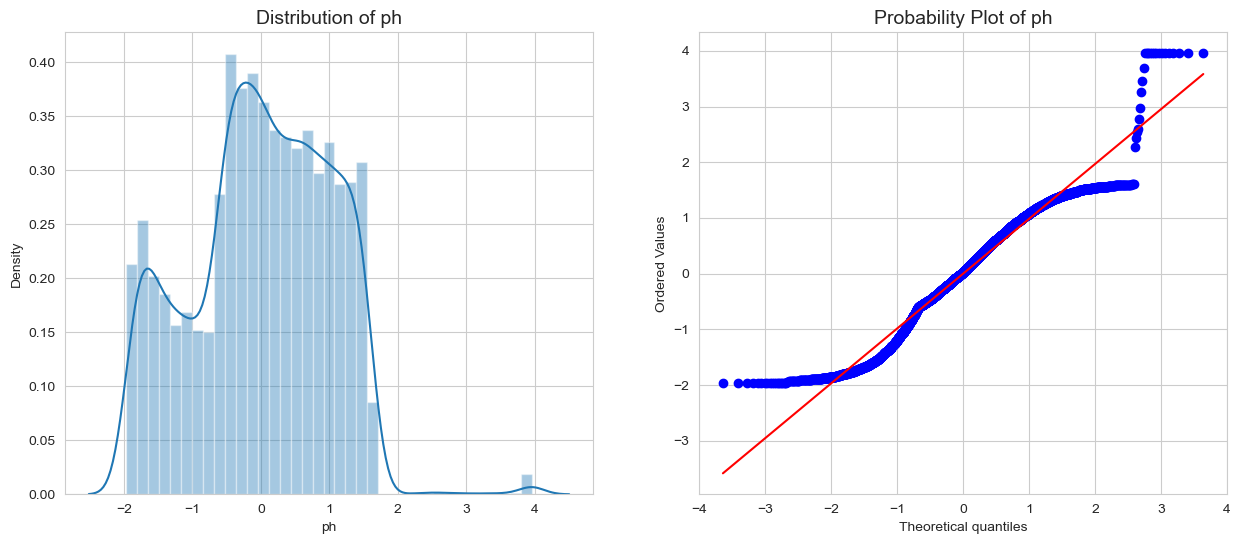

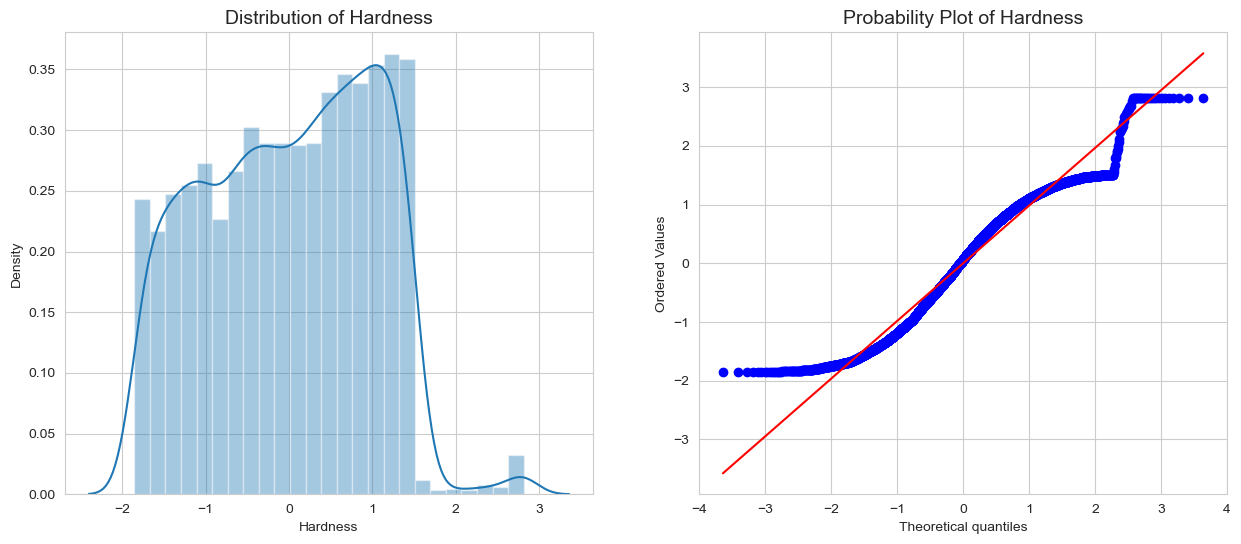

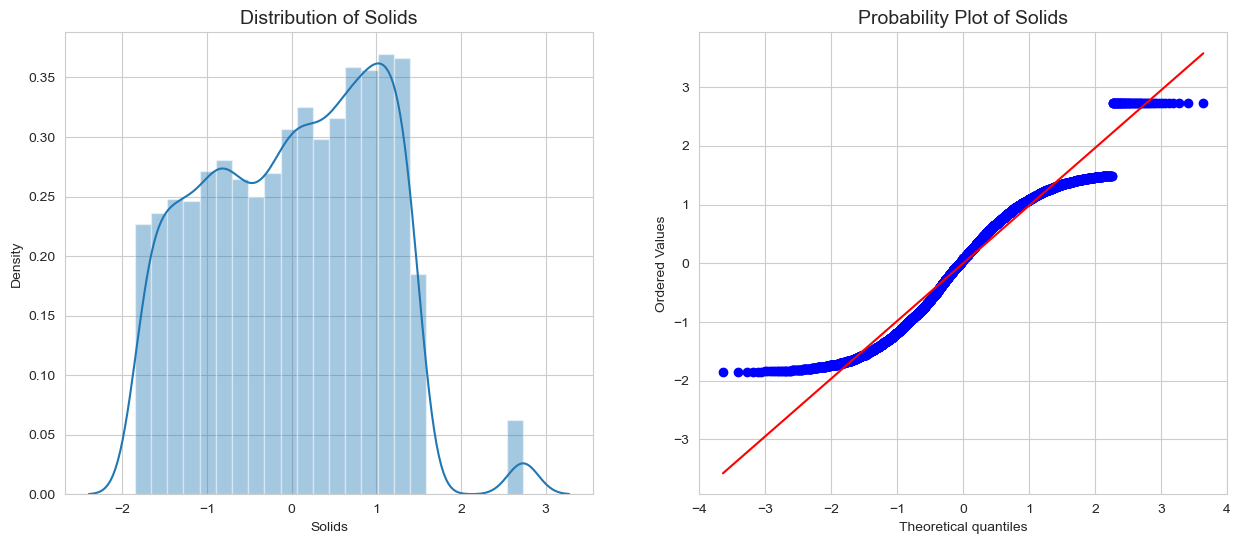

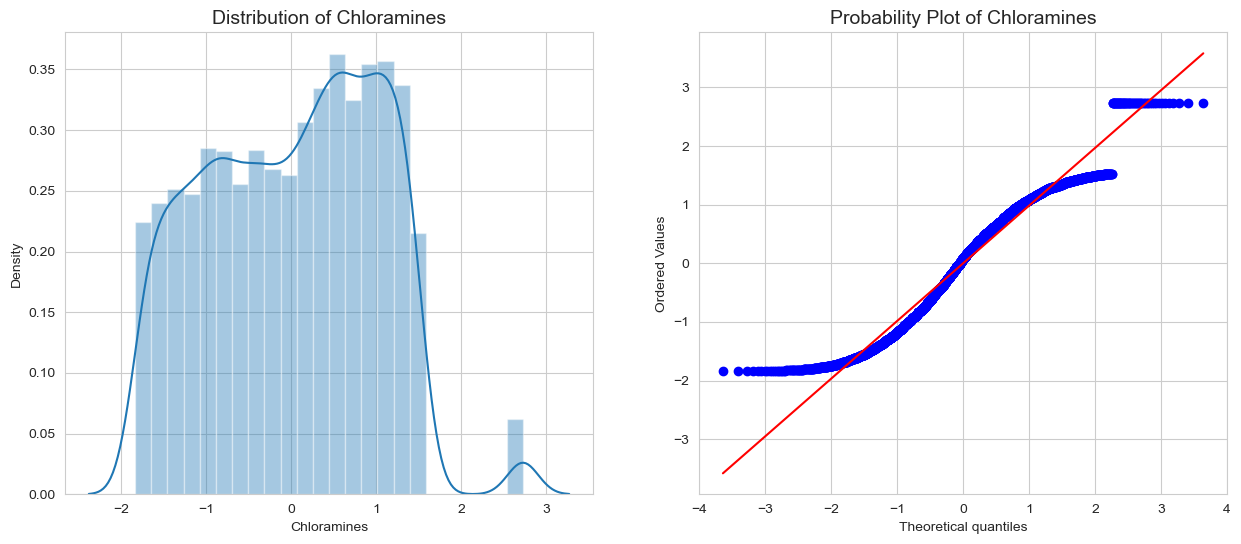

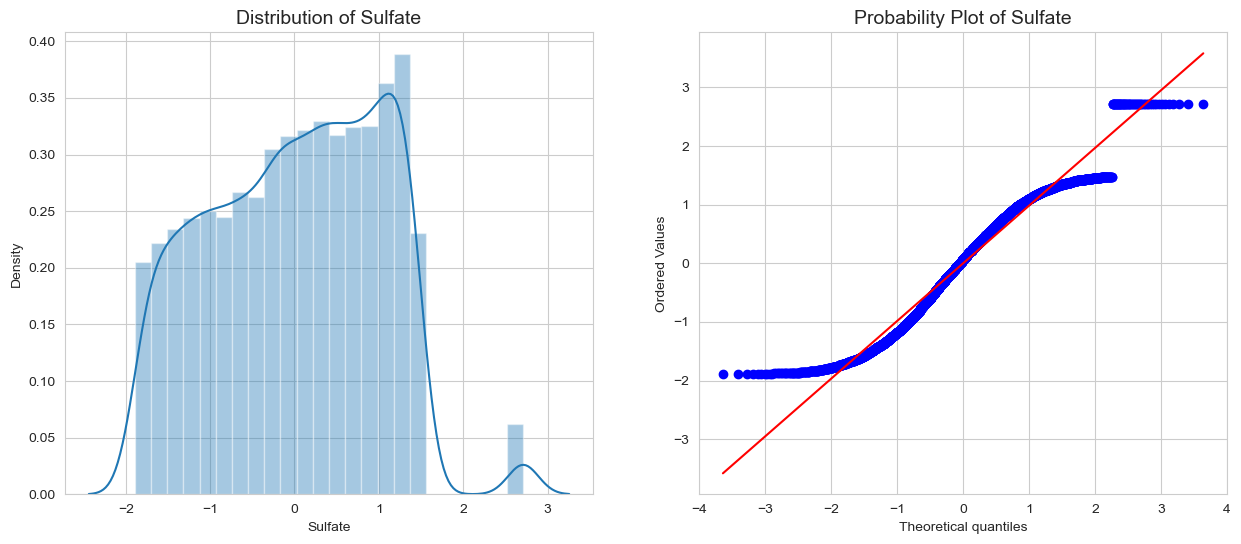

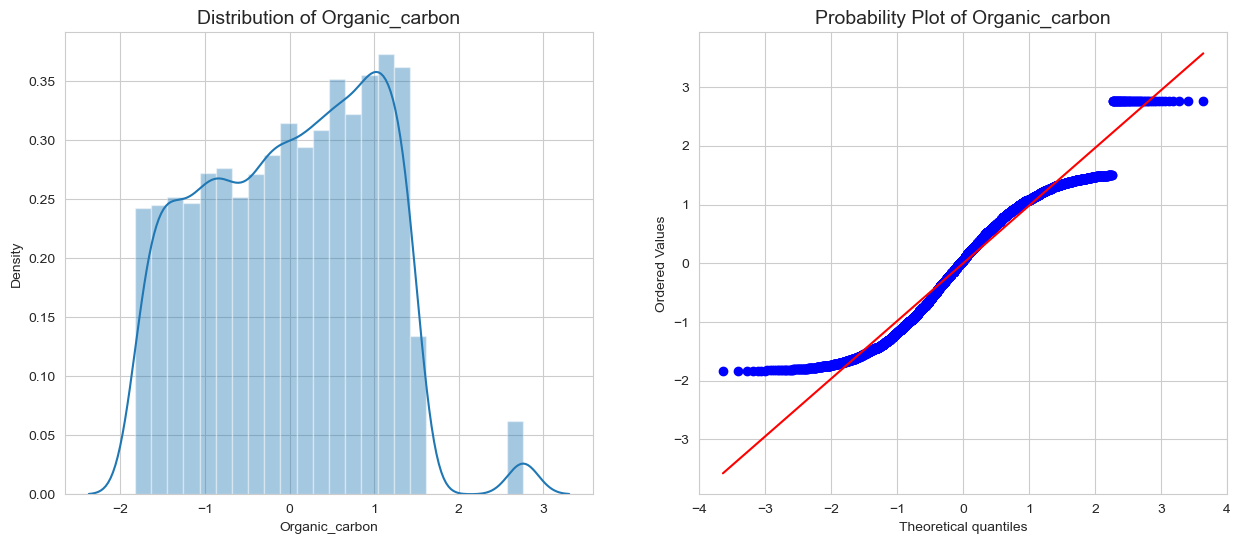

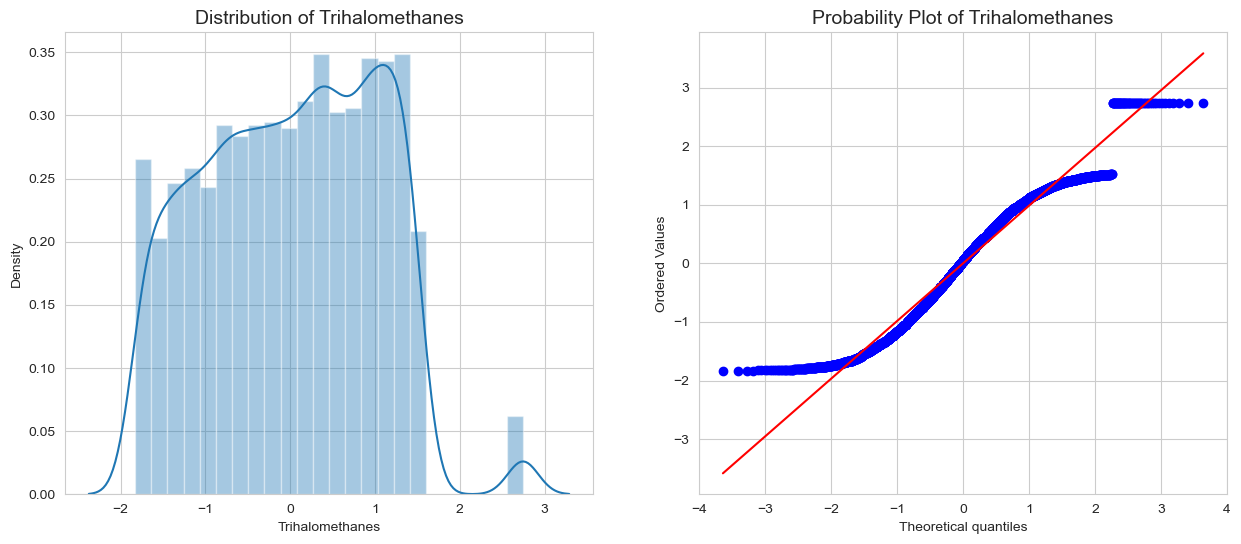

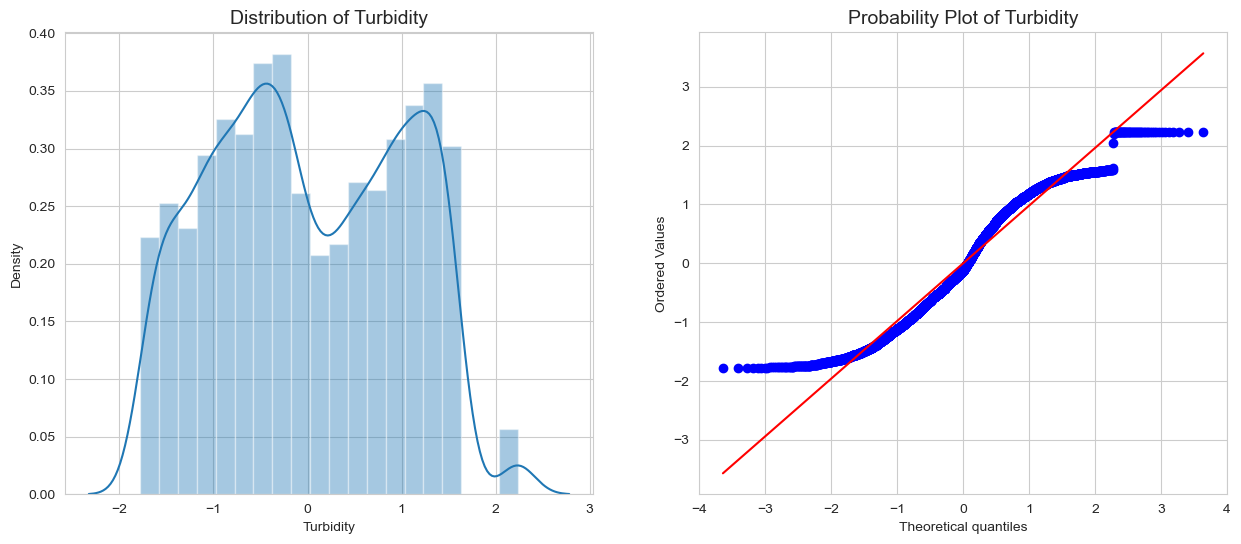

In [28]:
for x in selected_features:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot the distribution (distplot) on the first subplot
    sns.set_style('whitegrid')
    sns.distplot(df[x], ax=axes[0])
    axes[0].set_title("Distribution of " + x, fontsize=14)
    
    # Plot the Probability plot on the second subplot
    stats.probplot(df[x], dist="norm", plot=axes[1])
    axes[1].set_title("Probability Plot of " + x, fontsize=14)
    
    plt.show()

In [29]:
df

ph  Hardness    Solids  Chloramines   Sulfate  Organic_carbon  \
0    -0.899467  2.819119  2.731957     2.727068  2.710320        2.763803   
1     3.956586  2.072770  2.731957     2.727068  2.710320        2.763803   
2     3.956586  2.614147  2.731957     2.727068  2.710320        2.763803   
3     2.277901  2.819119  2.731957     2.727068  2.710320        2.763803   
4     1.553014  2.819119  2.731957     2.727068  2.710320        2.763803   
...        ...       ...       ...          ...       ...             ...   
5055 -0.825821 -0.939482 -1.575050    -0.288134 -1.064210       -1.333901   
5056  0.167609  1.281598  1.366330     0.380370  1.334247        1.261710   
5057 -0.437500  1.377440  0.273641     0.140480  0.500905        1.197434   
5058  1.412870 -1.851792 -1.206337    -1.183485 -1.451091       -0.536746   
5059 -0.081700  1.120295  1.065485     1.036784  0.394669        0.401999   

      Trihalomethanes  Turbidity  Check  
0            2.743802   2.237023    1.0  
1            2.743802   2.237023    1.0  
2            2.743802   2.237023    0.0  
3            2.743802   2.237023    1.0  
4            2.743802   2.237023    1.0  
...               ...        ...    ...  
5055        -0.437974  -1.162312    1.0  
5056         1.281629   0.126256    0.0  
5057         0.798269   1.230471    0.0  
5058        -0.387607  -1.671869    1.0  
5059         0.970929   1.384979    0.0  

[5060 rows x 9 columns]

In [30]:
df.describe()

ph      Hardness        Solids   Chloramines       Sulfate  \
count  5.060000e+03  5.060000e+03  5.060000e+03  5.060000e+03  5.060000e+03   
mean  -3.159528e-17 -3.145486e-16 -9.661134e-16 -3.033147e-16  2.639961e-16   
std    1.000099e+00  1.000099e+00  1.000099e+00  1.000099e+00  1.000099e+00   
min   -1.968544e+00 -1.856284e+00 -1.851560e+00 -1.839623e+00 -1.892001e+00   
25%   -6.045454e-01 -8.303185e-01 -8.417365e-01 -8.336256e-01 -8.226534e-01   
50%    2.641039e-02  5.849097e-02  7.138475e-02  8.162808e-02  6.074391e-02   
75%    7.892568e-01  8.403118e-01  8.375302e-01  8.305059e-01  8.301122e-01   
max    3.956586e+00  2.819119e+00  2.731957e+00  2.727068e+00  2.710320e+00   

       Organic_carbon  Trihalomethanes     Turbidity        Check  
count    5.060000e+03     5.060000e+03  5.060000e+03  5060.000000  
mean     1.117771e-15    -2.401241e-16 -6.108421e-16     0.498221  
std      1.000099e+00     1.000099e+00  1.000099e+00     0.500046  
min     -1.829243e+00    -1.829912e+00 -1.779826e+00     0.000000  
25%     -8.367214e-01    -8.113908e-01 -8.308594e-01     0.000000  
50%      5.512376e-02     4.501653e-02 -1.236118e-01     0.000000  
75%      8.392996e-01     8.359239e-01  9.014003e-01     1.000000  
max      2.763803e+00     2.743802e+00  2.237023e+00     1.000000

## CREATING A COPY OF ORIGINAL DATASET

In [31]:
copied_df = df.copy()
copied_df

ph  Hardness    Solids  Chloramines   Sulfate  Organic_carbon  \
0    -0.899467  2.819119  2.731957     2.727068  2.710320        2.763803   
1     3.956586  2.072770  2.731957     2.727068  2.710320        2.763803   
2     3.956586  2.614147  2.731957     2.727068  2.710320        2.763803   
3     2.277901  2.819119  2.731957     2.727068  2.710320        2.763803   
4     1.553014  2.819119  2.731957     2.727068  2.710320        2.763803   
...        ...       ...       ...          ...       ...             ...   
5055 -0.825821 -0.939482 -1.575050    -0.288134 -1.064210       -1.333901   
5056  0.167609  1.281598  1.366330     0.380370  1.334247        1.261710   
5057 -0.437500  1.377440  0.273641     0.140480  0.500905        1.197434   
5058  1.412870 -1.851792 -1.206337    -1.183485 -1.451091       -0.536746   
5059 -0.081700  1.120295  1.065485     1.036784  0.394669        0.401999   

      Trihalomethanes  Turbidity  Check  
0            2.743802   2.237023    1.0  
1            2.743802   2.237023    1.0  
2            2.743802   2.237023    0.0  
3            2.743802   2.237023    1.0  
4            2.743802   2.237023    1.0  
...               ...        ...    ...  
5055        -0.437974  -1.162312    1.0  
5056         1.281629   0.126256    0.0  
5057         0.798269   1.230471    0.0  
5058        -0.387607  -1.671869    1.0  
5059         0.970929   1.384979    0.0  

[5060 rows x 9 columns]

## SELECTING TARGET LABELS AND INPUT FEATURES

In [32]:
y = copied_df['Check']  # Targeted Values 
X = copied_df[selected_features]  # Input Features
X

ph  Hardness    Solids  Chloramines   Sulfate  Organic_carbon  \
0    -0.899467  2.819119  2.731957     2.727068  2.710320        2.763803   
1     3.956586  2.072770  2.731957     2.727068  2.710320        2.763803   
2     3.956586  2.614147  2.731957     2.727068  2.710320        2.763803   
3     2.277901  2.819119  2.731957     2.727068  2.710320        2.763803   
4     1.553014  2.819119  2.731957     2.727068  2.710320        2.763803   
...        ...       ...       ...          ...       ...             ...   
5055 -0.825821 -0.939482 -1.575050    -0.288134 -1.064210       -1.333901   
5056  0.167609  1.281598  1.366330     0.380370  1.334247        1.261710   
5057 -0.437500  1.377440  0.273641     0.140480  0.500905        1.197434   
5058  1.412870 -1.851792 -1.206337    -1.183485 -1.451091       -0.536746   
5059 -0.081700  1.120295  1.065485     1.036784  0.394669        0.401999   

      Trihalomethanes  Turbidity  
0            2.743802   2.237023  
1            2.743802   2.237023  
2            2.743802   2.237023  
3            2.743802   2.237023  
4            2.743802   2.237023  
...               ...        ...  
5055        -0.437974  -1.162312  
5056         1.281629   0.126256  
5057         0.798269   1.230471  
5058        -0.387607  -1.671869  
5059         0.970929   1.384979  

[5060 rows x 8 columns]

In [33]:
y

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
5055    1.0
5056    0.0
5057    0.0
5058    1.0
5059    0.0
Name: Check, Length: 5060, dtype: float64

## DATA SPLITTING

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

## IMPLEMENTING VARIOUS MACHINE LEARNING ALGORITHMS

### 1. DECISION TREE CLASSIFIER

In [35]:
# Import Library for Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

In [36]:
# Maximum number of levels in tree
max_depth = list(range(5, 101))

#Criterion
criterion = ["gini", "entropy", "log_loss"]


param_grid = {'criterion': criterion,
               'max_depth': max_depth
             }


In [37]:
dtree = DecisionTreeClassifier()


from sklearn.model_selection import GridSearchCV

dtree_grid = GridSearchCV(estimator = dtree, 
                       param_grid = param_grid, 
                       cv = 10)

dtree_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                       26, 27, 28, 29, 30, 31, 32, 33, 34, ...]})

In [38]:
dtree_grid.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [39]:
dtree_grid.best_score_

0.9943550568950424

In [40]:
dtree = DecisionTreeClassifier(**dtree_grid.best_params_)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

Accuracy on Training Data: 99.86%
Precision on Training Data: 99.89%
Recall on Training Data: 99.83%
F1 score on Training Data: 99.86%


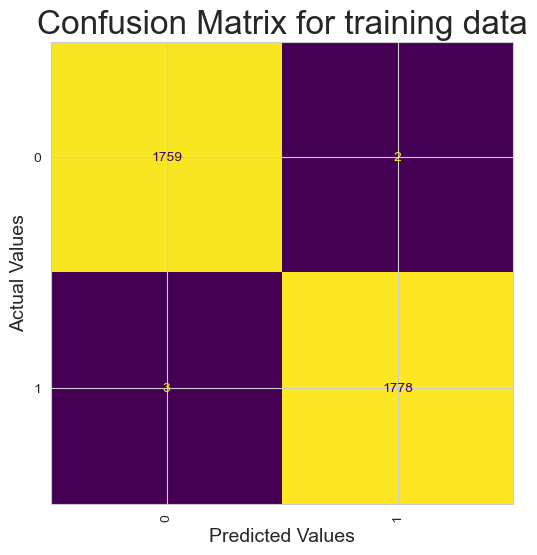

In [41]:
# Accuray On Training Data
decision_predict_train = dtree.predict(X_train)
decision_accuracy_train = accuracy_score(y_train, decision_predict_train)
print(f"Accuracy on Training Data: {decision_accuracy_train * 100:.2f}%")
# Precision on Training Data
print(f"Precision on Training Data: {precision_score(y_train, decision_predict_train) * 100:.2f}%")
#Recall on training data
print(f"Recall on Training Data: {recall_score( y_train, decision_predict_train) * 100:.2f}%")
# F1 score on training data
print(f"F1 score on Training Data: {f1_score( y_train, decision_predict_train) * 100:.2f}%")

# View Confusion Matrix
cm = confusion_matrix(y_train, decision_predict_train)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
fig, ax = plt.subplots(figsize = (6,6))
disp.plot(ax = ax,colorbar=False)
plt.title("Confusion Matrix for training data", fontsize=24)
plt.xlabel("Predicted Values", fontsize=14)
plt.ylabel("Actual Values", fontsize=14)
plt.xticks(rotation=90)
plt.show()

Accuracy on Test Data: 99.34%
Precision on Test Data: 99.06 %
Recall on Test Data: 99.59 %
F1 score on Test Data: 99.33 %


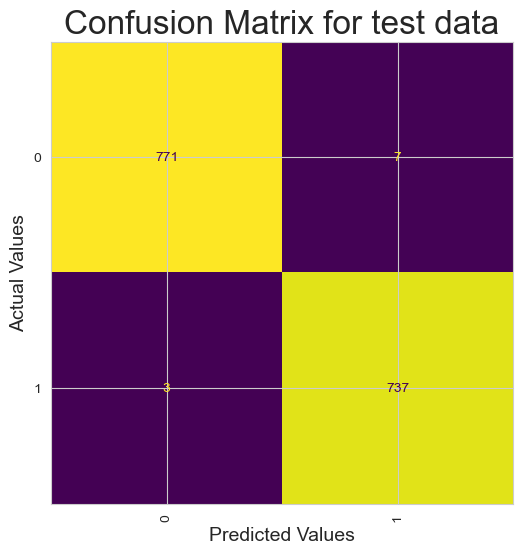

In [42]:
# Accuray On Test Data
decision_predict_test = dtree.predict(X_test)
decision_accuracy_test = accuracy_score(y_test, decision_predict_test)
print(f"Accuracy on Test Data: {decision_accuracy_test * 100:.2f}%")

# Precision on Test Data
decision_precision = precision_score(y_test, decision_predict_test)
print("Precision on Test Data: {:.2f} %".format(decision_precision * 100))

# Recall on Test data
decision_recall = recall_score(y_test, decision_predict_test)
print("Recall on Test Data: {:.2f} %".format(decision_recall * 100))

# F1 score on Test data
decision_f1 = f1_score(y_test, decision_predict_test)
print("F1 score on Test Data: {:.2f} %".format(decision_f1 * 100))

# View Confusion Matrix
cm = confusion_matrix(y_test, decision_predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
fig, ax = plt.subplots(figsize = (6,6) )
disp.plot(ax = ax,colorbar=False)
plt.title("Confusion Matrix for test data", fontsize=24)
plt.xlabel("Predicted Values", fontsize=14)
plt.ylabel("Actual Values", fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [43]:
# Get the unique classes from the 'Check' column and convert them into a list
unique_classes = copied_df['Check'].unique().tolist()

# Print the list of unique classes
class_names = [str(cls) for cls in unique_classes]  # Ensure class_names are strings
print(class_names)

['1.0', '0.0']


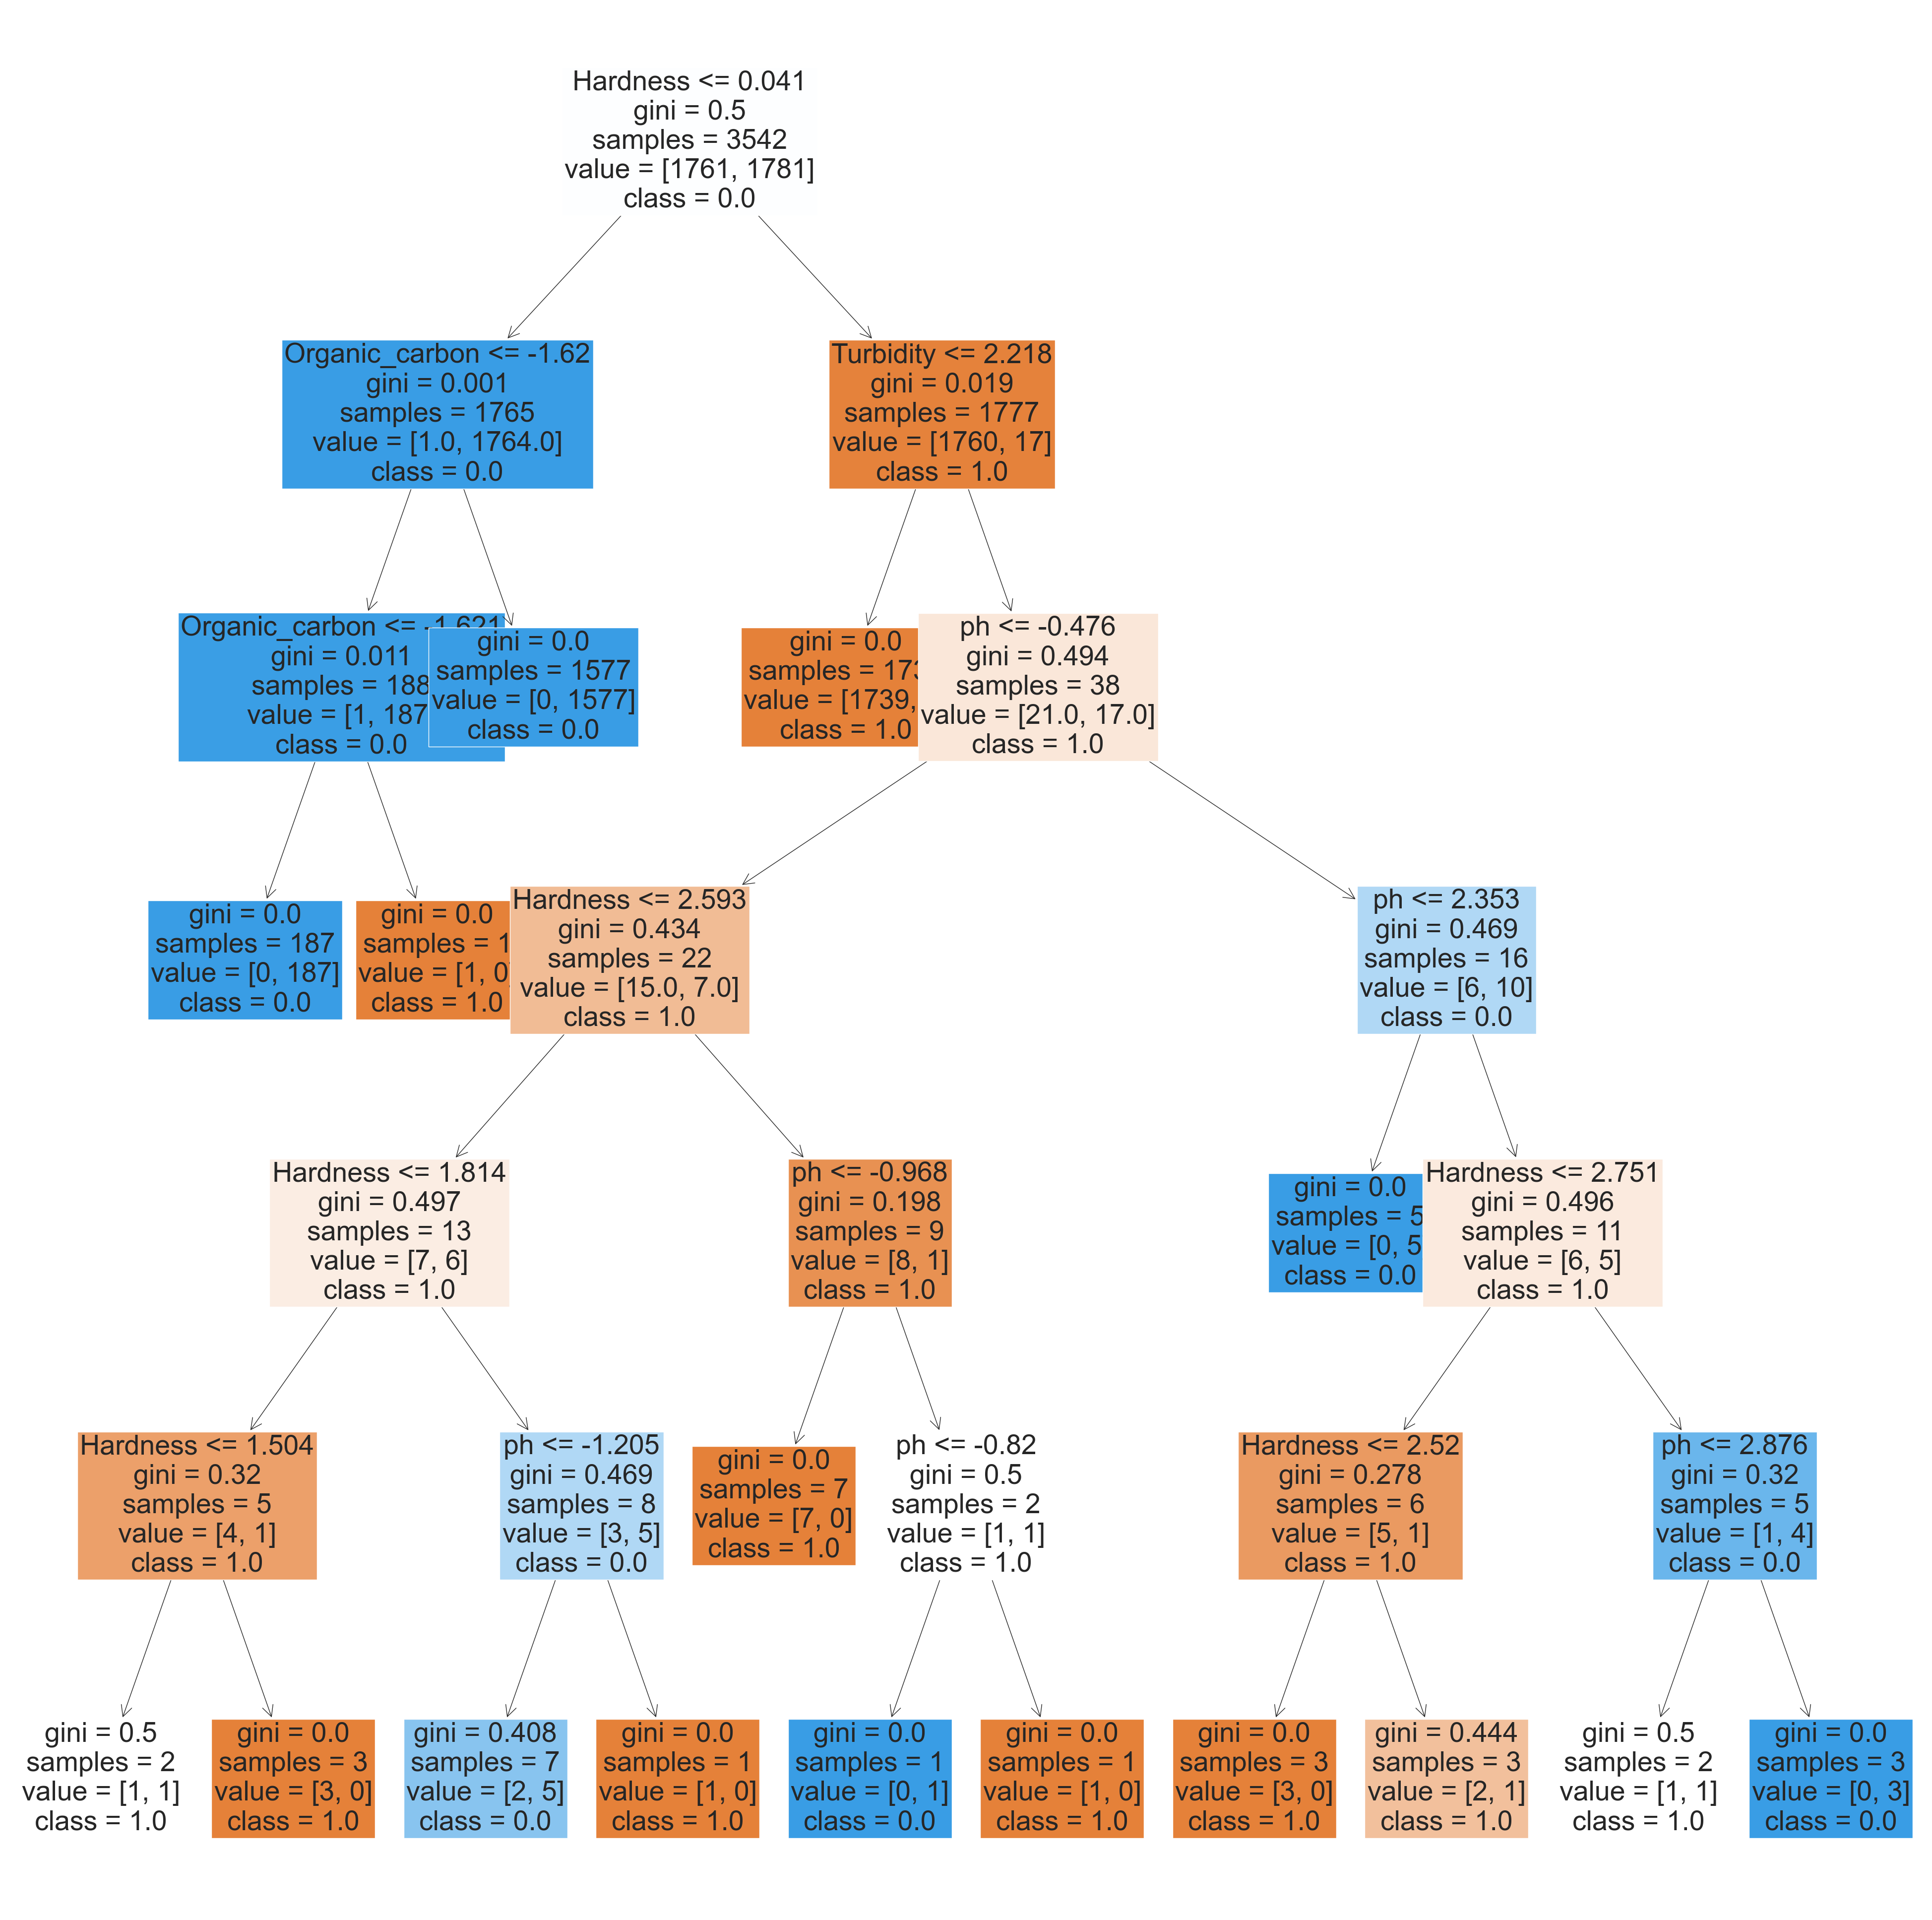

In [44]:
# VISUALIZING THE CLASSIFIER
from sklearn.tree import plot_tree

# Display the decision tree
plt.figure(figsize=(50,50))
plot_tree(dtree, filled=True, feature_names=selected_features, class_names=class_names,fontsize=40)
plt.show()


### 2. RANDOM FOREST CLASSIFIER

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [46]:
rf = BalancedRandomForestClassifier(n_estimators=100, random_state=0 )
rf.fit(X_train,y_train)

BalancedRandomForestClassifier(random_state=0)

In [47]:
# Prediction of Train and Test Dataset
random_predict_train = rf.predict(X_train)
random_predict_test = rf.predict(X_test)

Accuracy on Training Data : 100.00 %
Precision on Training Data: 100.00 %
Recall on Training Data: 100.00 %
F1 score on Training Data: 100.00%


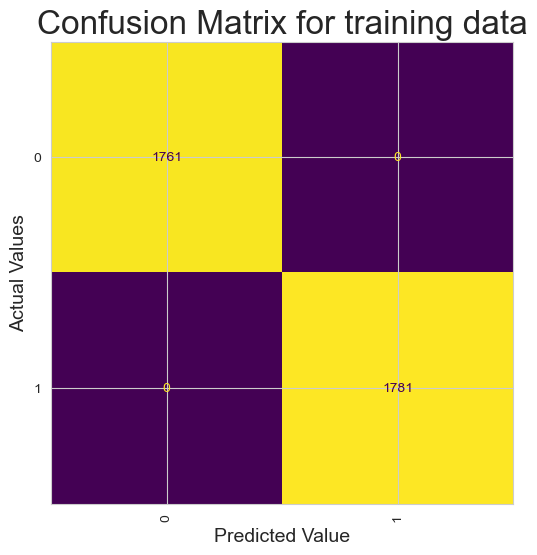

In [48]:
# Accuracy of Training Data
print("Accuracy on Training Data : {:.2f} %".format(accuracy_score( y_train, random_predict_train) * 100) )
print("Precision on Training Data: {:.2f} %".format(precision_score( y_train, random_predict_train) * 100) )
print("Recall on Training Data: {:.2f} %".format(recall_score( y_train, random_predict_train) * 100) )
print(f"F1 score on Training Data: {f1_score( y_train, random_predict_train) * 100:.2f}%")
# Visualising Confusion Matrix
cm = confusion_matrix(y_train, random_predict_train)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
fig, ax = plt.subplots( figsize = (6,6) )
disp.plot(ax = ax,colorbar=False)
plt.title("Confusion Matrix for training data", fontsize=24)
plt.xlabel("Predicted Value", fontsize=14)
plt.ylabel("Actual Values", fontsize=14)
plt.xticks(rotation=90)
plt.show()


Accuracy on Test Data: 99.41 %
Precision on Test Data: 99.19 %
Recall on Test Data: 99.59 %
F1 score on Test Data: 99.39 %


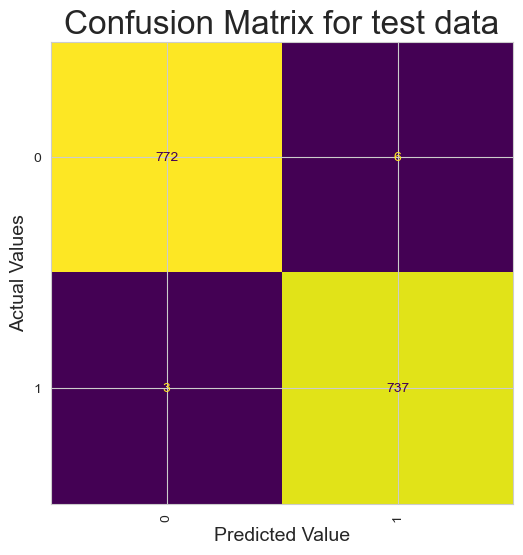

In [49]:
# Accuracy of Testing Dataset
random_accuracy = accuracy_score(y_test, random_predict_test)
print("Accuracy on Test Data: {:.2f} %".format(random_accuracy * 100))

# Precision on Testing Dataset
random_precision = precision_score(y_test, random_predict_test)
print("Precision on Test Data: {:.2f} %".format(random_precision * 100))

# Recall on Testing Dataset
random_recall = recall_score(y_test, random_predict_test)
print("Recall on Test Data: {:.2f} %".format(random_recall * 100))

# F1 score
random_f1 = f1_score(y_test, random_predict_test)
print("F1 score on Test Data: {:.2f} %".format(random_f1 * 100))


# Confusion Matrix
cm = confusion_matrix(y_test,random_predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
fig, ax = plt.subplots( figsize = (6,6) )
disp.plot(ax = ax,colorbar=False)
plt.title("Confusion Matrix for test data", fontsize=24)
plt.xlabel("Predicted Value", fontsize=14)
plt.ylabel("Actual Values", fontsize=14)
plt.xticks(rotation=90)
plt.show()

ENTER THE TREE NUMBER FROM 1 TO 100 THAT YOU WANT TO VISUALIZE: 51


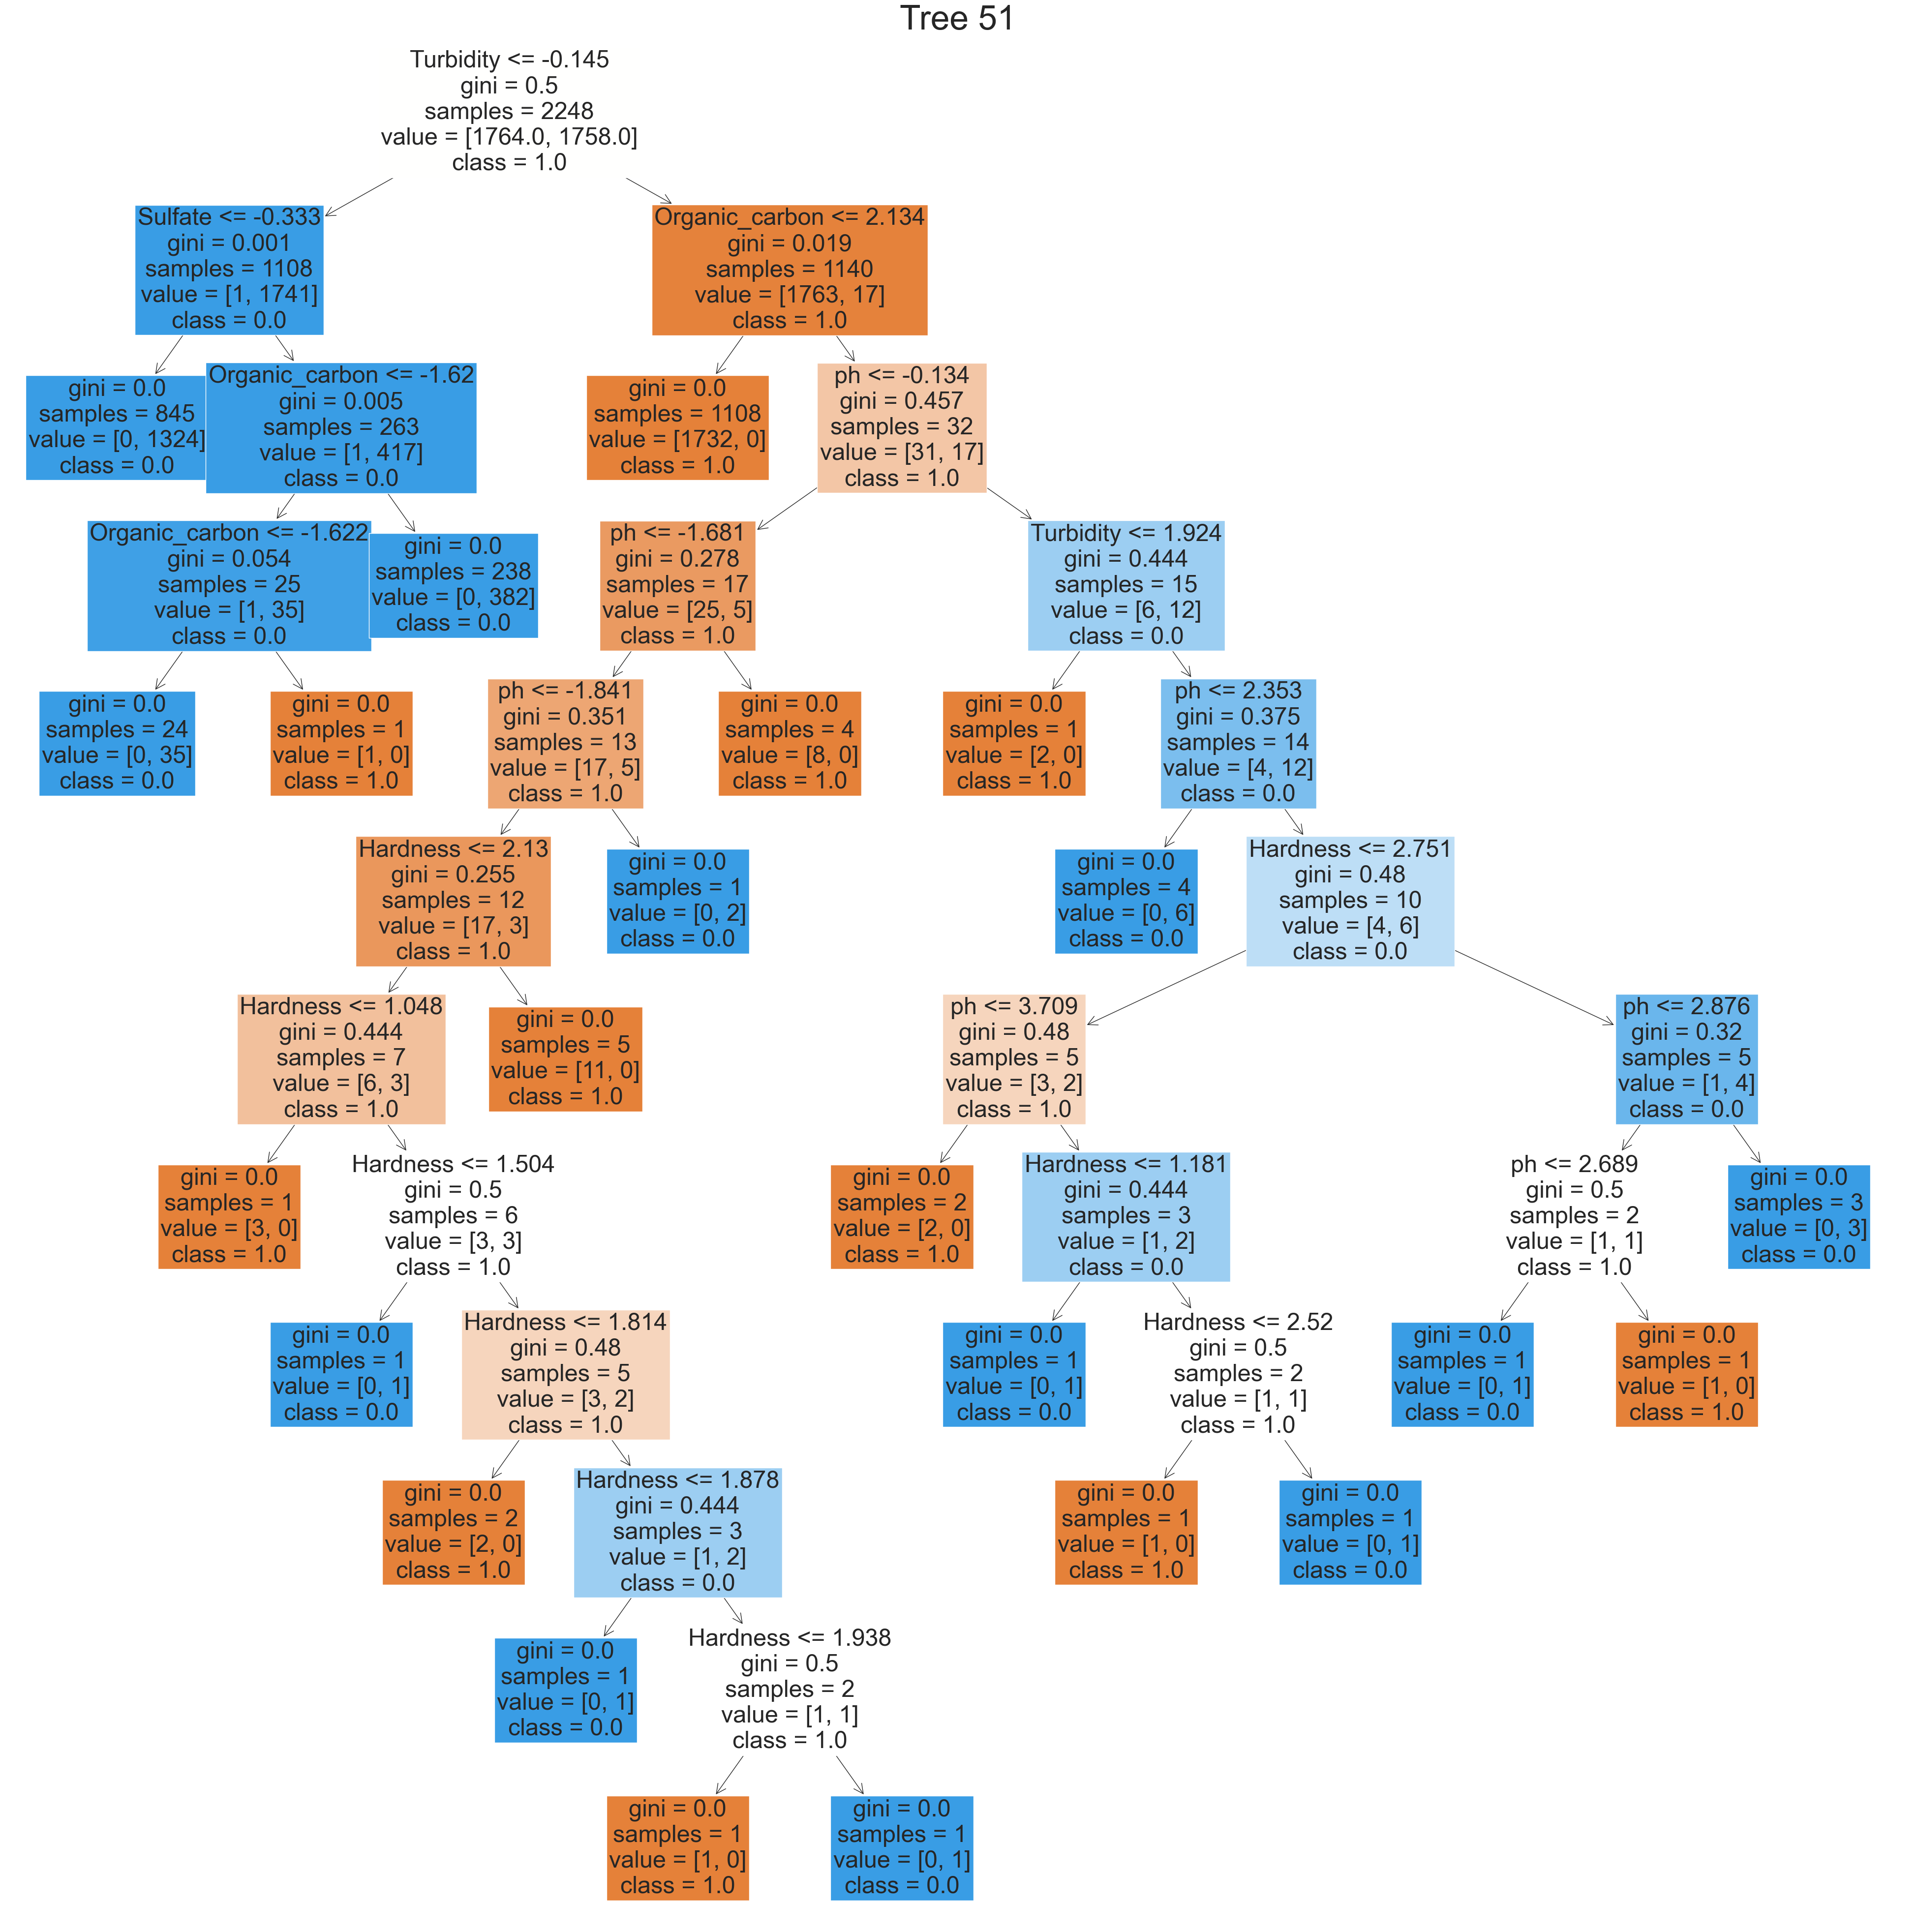

In [50]:
# TO STUDY ONE SINGLE TREE AT A TIME

# Taking user input as the tree number
tree_num = int(input("ENTER THE TREE NUMBER FROM 1 TO " + str(len(rf.estimators_)) + " THAT YOU WANT TO VISUALIZE:"))

# VISUALIZE THE INDIVIDUAL TREE THAT THE USER WANTS TO SEE
plt.figure(figsize=(50,50))  # Adjust the figure size as needed
plot_tree(rf.estimators_[tree_num-1], filled=True, feature_names=selected_features, class_names=class_names, fontsize = 35)
plt.title(f'Tree {tree_num}', fontsize=50)
plt.show()


### 3. LOGISTIC REGRESSION

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
# Regularization to consider
penalty = ["l1", "l2", "elasticnet", None]

In [53]:
param_grid = {'penalty': penalty}

In [54]:
clf = LogisticRegression()

In [55]:
from sklearn.model_selection import GridSearchCV

clf_grid = GridSearchCV(estimator = clf, 
                       param_grid = param_grid, 
                       cv = 10, 
                       verbose=2, 
                       n_jobs = -1)

In [56]:
clf_grid.fit(X_train,y_train) 

Fitting 10 folds for each of 4 candidates, totalling 40 fits


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', None]},
             verbose=2)

In [57]:
clf_grid.best_params_

{'penalty': 'l2'}

In [58]:
clf_grid.best_score_

0.9946367470358876

In [59]:
clf = LogisticRegression(**clf_grid.best_params_)
clf.fit(X_train,y_train)

LogisticRegression()

In [60]:
logistic_predict_train = clf.predict(X_train)
logistic_predict_test = clf.predict(X_test)

Accuracy on Training Data : 99.46 %
Precision on Training Data: 99.94 %
Recall on Training Data: 98.99 %
F1 score on Training Data: 99.46 %


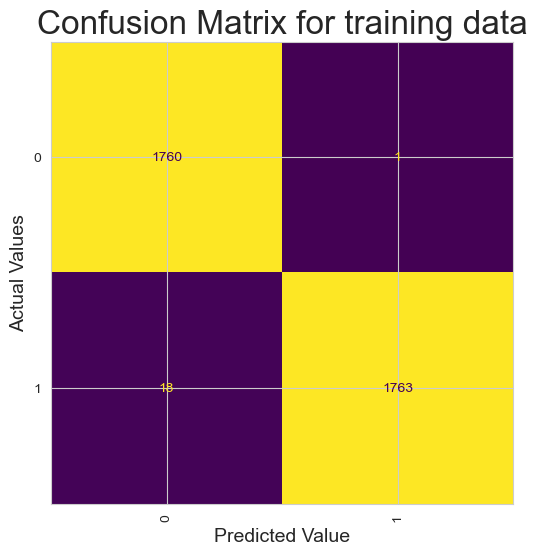

In [61]:
# Accuracy of Training Data
print("Accuracy on Training Data : {:.2f} %".format(accuracy_score( y_train, logistic_predict_train) * 100) )
print("Precision on Training Data: {:.2f} %".format(precision_score( y_train, logistic_predict_train) * 100) )
print("Recall on Training Data: {:.2f} %".format(recall_score( y_train, logistic_predict_train) * 100))
print("F1 score on Training Data: {:.2f} %".format(f1_score(y_train,logistic_predict_train)*100))
# Visualising Confusion Matrix
cm = confusion_matrix(y_train, logistic_predict_train)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
fig, ax = plt.subplots( figsize = (6,6) )
disp.plot(ax = ax,colorbar=False)
plt.title("Confusion Matrix for training data", fontsize=24)
plt.xlabel("Predicted Value", fontsize=14)
plt.ylabel("Actual Values", fontsize=14)
plt.xticks(rotation=90)
plt.show()


Accuracy on Test Data: 99.60 %
Precision on Test Data: 99.86 %
Recall on Test Data: 99.32 %
F1 score on Test Data: 99.59 %


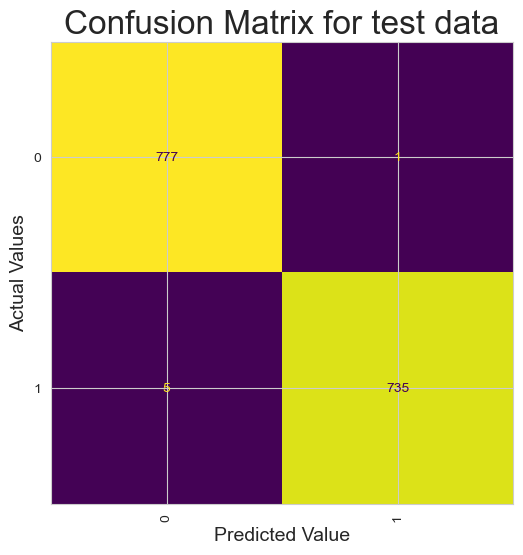

In [62]:
# Accuracy of Testing Dataset
logistic_accuracy = accuracy_score(y_test, logistic_predict_test)
print("Accuracy on Test Data: {:.2f} %".format(logistic_accuracy * 100))

# Precision on Testing Dataset
logistic_precision = precision_score(y_test, logistic_predict_test)
print("Precision on Test Data: {:.2f} %".format(logistic_precision * 100))

# Recall on Testing Dataset
logistic_recall = recall_score(y_test, logistic_predict_test)
print("Recall on Test Data: {:.2f} %".format(logistic_recall * 100))

# F1 score
logistic_f1 = f1_score(y_test, logistic_predict_test)
print("F1 score on Test Data: {:.2f} %".format(logistic_f1 * 100))


# Confusion Matrix
cm = confusion_matrix(y_test, logistic_predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
fig, ax = plt.subplots( figsize = (6,6) )
disp.plot(ax = ax,colorbar=False)
plt.title("Confusion Matrix for test data", fontsize=24)
plt.xlabel("Predicted Value", fontsize=14)
plt.ylabel("Actual Values", fontsize=14)
plt.xticks(rotation=90)
plt.show()

### 4. SUPPORT VECTOR MACHINES

In [63]:
from sklearn.svm import SVC

In [64]:
kernel = ["linear", "poly", "rbf", "sigmoid"]

param_grid = {'kernel': kernel}

support_vector_classifier = SVC()

svc_grid = GridSearchCV(estimator = support_vector_classifier, 
                       param_grid = param_grid, 
                       cv = 10, 
                       verbose=2, 
                       n_jobs = -1)

svc_grid.fit(X_train,y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)

In [65]:
svc_grid.best_params_

{'kernel': 'linear'}

In [66]:
svc_grid.best_score_

0.9946367470358876

In [67]:
support_vector_classifier = SVC(**svc_grid.best_params_)
support_vector_classifier.fit(X_train, y_train.ravel())

SVC(kernel='linear')

In [68]:
svm_predict_train = support_vector_classifier.predict(X_train)
svm_predict_test = support_vector_classifier.predict(X_test)

Accuracy on Training Data : 99.46 %
Precision on Training Data: 99.94 %
Recall on Training Data: 98.99 %
F1 score on Training Data: 99.46 %


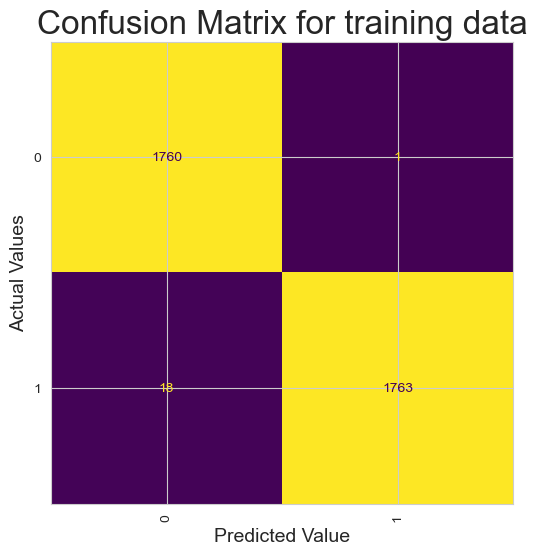

In [69]:
# Accuracy of Training Data
print("Accuracy on Training Data : {:.2f} %".format(accuracy_score( y_train, svm_predict_train) * 100) )
print("Precision on Training Data: {:.2f} %".format(precision_score( y_train, svm_predict_train) * 100) )
print("Recall on Training Data: {:.2f} %".format(recall_score( y_train, svm_predict_train) * 100) )
print("F1 score on Training Data: {:.2f} %".format(f1_score(y_train,svm_predict_train)*100))
# Visualising Confusion Matrix
cm = confusion_matrix(y_train, svm_predict_train)
disp = ConfusionMatrixDisplay( confusion_matrix = cm)
fig, ax = plt.subplots( figsize = (6,6) )
disp.plot(ax = ax,colorbar=False)
plt.title("Confusion Matrix for training data", fontsize=24)
plt.xlabel("Predicted Value", fontsize=14)
plt.ylabel("Actual Values", fontsize=14)
plt.xticks(rotation=90)
plt.show()


Accuracy on Test Data: 99.60 %
Precision on Test Data: 99.86 %
Recall on Test Data: 99.32 %
F1 score on Test Data: 99.59 %


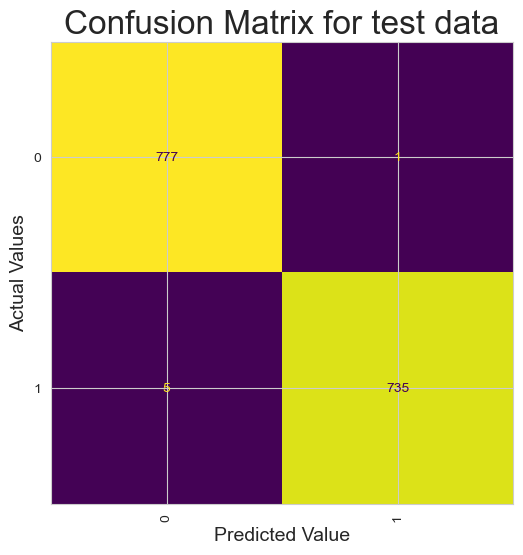

In [70]:
# Accuracy on Test Data
svm_accuracy = accuracy_score(y_test, svm_predict_test)
print("Accuracy on Test Data: {:.2f} %".format(svm_accuracy * 100))

# Precision on Testing Dataset
svm_precision = precision_score(y_test, svm_predict_test)
print("Precision on Test Data: {:.2f} %".format(svm_precision * 100))

# Recall on Testing Dataset
svm_recall = recall_score(y_test, svm_predict_test)
print("Recall on Test Data: {:.2f} %".format(svm_recall * 100))

# F1 score
svm_f1 = f1_score(y_test, svm_predict_test)
print("F1 score on Test Data: {:.2f} %".format(svm_f1 * 100))


# Confusion Matrix
cm = confusion_matrix(y_test, svm_predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
fig, ax = plt.subplots( figsize = (6,6) )
disp.plot(ax = ax,colorbar=False)
plt.title("Confusion Matrix for test data", fontsize=24)
plt.xlabel("Predicted Value", fontsize=14)
plt.ylabel("Actual Values", fontsize=14)
plt.xticks(rotation=90)
plt.show()

#### 5. K-NEAREST NEIGHBOUR

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
n_neighbors = list(range(3, 21))

param_grid = {'n_neighbors': n_neighbors}

knn_classifier = KNeighborsClassifier()

knn_grid = GridSearchCV(estimator = knn_classifier, 
                       param_grid = param_grid, 
                       cv = 10, 
                       verbose=2, 
                       n_jobs = -1)

knn_grid.fit(X_train,y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20]},
             verbose=2)

In [73]:
knn_grid.best_params_

{'n_neighbors': 15}

In [74]:
knn_grid.best_score_

0.9952001273175778

In [75]:
knn_classifier = KNeighborsClassifier(**knn_grid.best_params_) 
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [76]:
knn_train = knn_classifier.predict(X_train)
knn_test = knn_classifier.predict(X_test)

Accuracy on Training Data: 99.52 %
Precision on Training Data: 99.55 %
Recall on Training Data: 99.49 %
F1 score on Training Data: 99.52 %


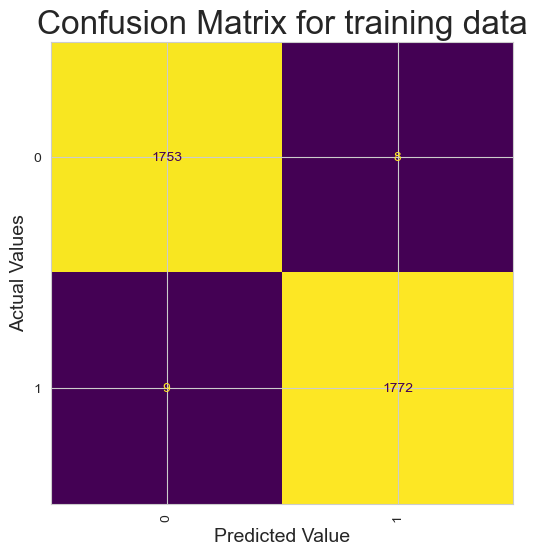

In [77]:
# Accuracy of Training Data
print("Accuracy on Training Data: {:.2f} %".format(accuracy_score( y_train, knn_train) * 100) )
print("Precision on Training Data: {:.2f} %".format(precision_score( y_train, knn_train) * 100) )
print("Recall on Training Data: {:.2f} %".format(recall_score( y_train, knn_train) * 100) )
print("F1 score on Training Data: {:.2f} %".format(f1_score(y_train,knn_train)*100))
# Visualising Confusion Matrix
cm = confusion_matrix(y_train, knn_train)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
fig, ax = plt.subplots( figsize = (6,6) )
disp.plot(ax = ax,colorbar=False)
plt.title("Confusion Matrix for training data", fontsize=24)
plt.xlabel("Predicted Value", fontsize=14)
plt.ylabel("Actual Values", fontsize=14)
plt.xticks(rotation=90)
plt.show()


Accuracy on Test Data: 99.41 %
Precision on Test Data: 98.80 %
Recall on Test Data: 100.00 %
F1 score on Test Data: 99.40 %


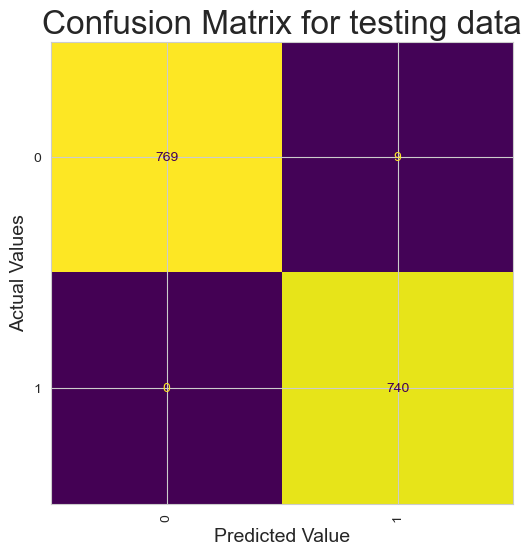

In [78]:
# Accuracy on Test Data
knn_accuracy = accuracy_score(y_test, knn_test)
print("Accuracy on Test Data: {:.2f} %".format(knn_accuracy * 100))

# Precision on Testing Dataset
knn_precision = precision_score(y_test, knn_test)
print("Precision on Test Data: {:.2f} %".format(knn_precision * 100))

# Recall on Testing Dataset
knn_recall = recall_score(y_test, knn_test)
print("Recall on Test Data: {:.2f} %".format(knn_recall * 100))

# F1 score
knn_f1 = f1_score(y_test, knn_test)
print("F1 score on Test Data: {:.2f} %".format(knn_f1 * 100))


# Confusion Matrix
cm = confusion_matrix(y_test, knn_test)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
fig, ax = plt.subplots( figsize = (6,6) )
disp.plot(ax = ax,colorbar=False)
plt.title("Confusion Matrix for testing data", fontsize=24)
plt.xlabel("Predicted Value", fontsize=14)
plt.ylabel("Actual Values", fontsize=14)
plt.xticks(rotation=90)
plt.show()

#### 7. GAUSSIAN NAIVE BAYES

In [79]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [80]:
gnb_train = gnb.predict(X_train)
gnb_test = gnb.predict(X_test)

Accuracy on Training Data : 99.46 %
Precision on Training Data: 99.94 %
Recall on Training Data: 98.99 %
F1 score on Training Data: 99.46 %


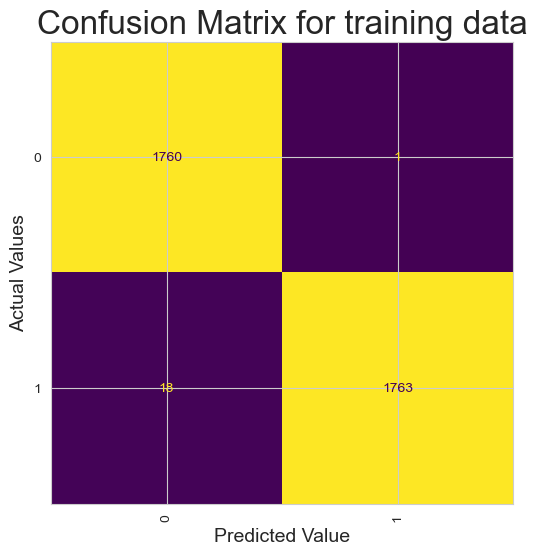

In [81]:
# Accuracy of Training Data
print("Accuracy on Training Data : {:.2f} %".format(accuracy_score( y_train, gnb_train) * 100) )
print("Precision on Training Data: {:.2f} %".format(precision_score( y_train, gnb_train) * 100) )
print("Recall on Training Data: {:.2f} %".format(recall_score( y_train, gnb_train) * 100) )
print("F1 score on Training Data: {:.2f} %".format(f1_score(y_train,gnb_train)*100))
# Visualising Confusion Matrix
cm = confusion_matrix(y_train, gnb_train)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
fig, ax = plt.subplots( figsize = (6,6) )
disp.plot(ax = ax,colorbar=False)
plt.title("Confusion Matrix for training data", fontsize=24)
plt.xlabel("Predicted Value", fontsize=14)
plt.ylabel("Actual Values", fontsize=14)
plt.xticks(rotation=90)
plt.show()

Accuracy on Test Data: 99.60 %
Precision on Test Data: 99.86 %
Recall on Test Data: 99.32 %
F1 score on Test Data: 99.59 %


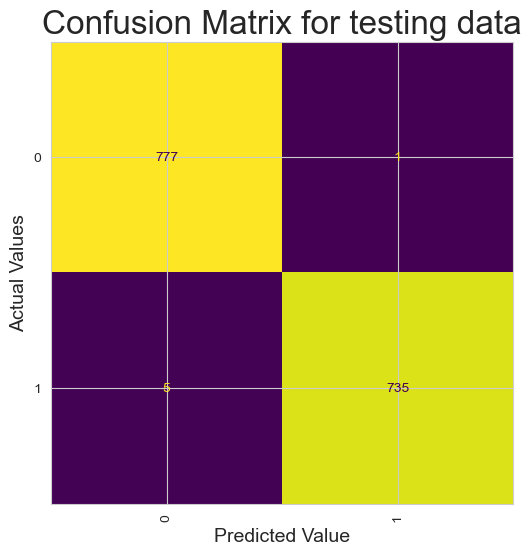

In [82]:
# Accuracy on Test Data
gnb_accuracy = accuracy_score(y_test, gnb_test)
print("Accuracy on Test Data: {:.2f} %".format(gnb_accuracy * 100))

# Precision on Testing Dataset
gnb_precision = precision_score(y_test, gnb_test)
print("Precision on Test Data: {:.2f} %".format(gnb_precision * 100))

# Recall on Testing Dataset
gnb_recall = recall_score(y_test, gnb_test)
print("Recall on Test Data: {:.2f} %".format(gnb_recall * 100))

# F1 score
gnb_f1 = f1_score(y_test, gnb_test)
print("F1 score on Test Data: {:.2f} %".format(gnb_f1 * 100))


# Confusion Matrix
cm = confusion_matrix(y_test, gnb_test)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
fig, ax = plt.subplots( figsize = (6,6) )
disp.plot(ax = ax,colorbar=False)
plt.title("Confusion Matrix for testing data", fontsize=24)
plt.xlabel("Predicted Value", fontsize=14)
plt.ylabel("Actual Values", fontsize=14)
plt.xticks(rotation=90)
plt.show()

#### 8. EXTREME GRADIENT BOOSTING (XGBoost)

In [83]:
# Import Library
import xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 18)
xgb.fit(X_train, y_train) # Fit Data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=18, ...)

Accuracy on Train Data: 99.69%
Precision on Training Data: 99.94 %
Recall on Training Data: 99.44 %
F1 score on Training Data: 99.69 %


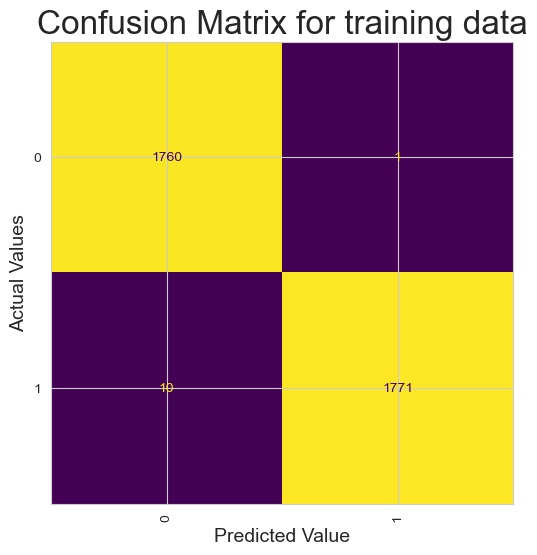

In [84]:
# Accuray On Test Data
xgb_predict_train = xgb.predict(X_train)
xgb_accuracy_train = accuracy_score( y_train, xgb_predict_train )
print(f"Accuracy on Train Data: {xgb_accuracy_train * 100:.2f}%")
print("Precision on Training Data: {:.2f} %".format(precision_score( y_train, xgb_predict_train) * 100) )
print("Recall on Training Data: {:.2f} %".format(recall_score( y_train, xgb_predict_train) * 100) )
print("F1 score on Training Data: {:.2f} %".format(f1_score(y_train,xgb_predict_train)*100))

# Visualising Confusion Matrix
cm = confusion_matrix(y_train, xgb_predict_train)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
fig, ax = plt.subplots( figsize = (6,6) )
disp.plot(ax = ax,colorbar=False)
plt.title("Confusion Matrix for training data", fontsize=24)
plt.xlabel("Predicted Value", fontsize=14)
plt.ylabel("Actual Values", fontsize=14)
plt.xticks(rotation=90)
plt.show()

Accuracy on Test Data: 99.47 %
Precision on Test Data: 99.46 %
Recall on Test Data: 99.46 %
F1 score on Test Data: 99.46 %


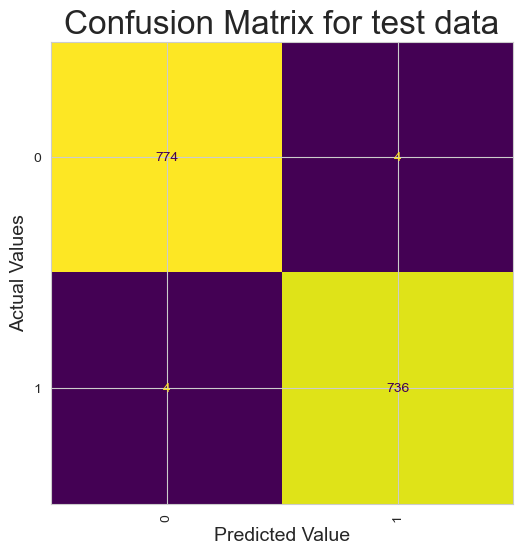

In [85]:
# Accuray On Test Data
xgb_predict_test = xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predict_test)

print("Accuracy on Test Data: {:.2f} %".format(xgb_accuracy * 100))

# Precision on Testing Dataset
xgb_precision = precision_score(y_test, xgb_predict_test)
print("Precision on Test Data: {:.2f} %".format(xgb_precision * 100))

# Recall on Testing Dataset
xgb_recall = recall_score(y_test, xgb_predict_test)
print("Recall on Test Data: {:.2f} %".format(xgb_recall * 100))

# F1 score
xgb_f1 = f1_score(y_test, xgb_predict_test)
print("F1 score on Test Data: {:.2f} %".format(xgb_f1 * 100))


# Visualising Confusion Matrix
cm = confusion_matrix(y_test, xgb_predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
fig, ax = plt.subplots( figsize = (6,6) )
disp.plot(ax = ax,colorbar=False)
plt.title("Confusion Matrix for test data", fontsize=24)
plt.xlabel("Predicted Value", fontsize=14)
plt.ylabel("Actual Values", fontsize=14)
plt.xticks(rotation=90)
plt.show()


### STORING ALL METRICS IN RESPECTIVE LISTS

In [86]:
accuracy = []
precision = []
recall = []
F1 = []
model_name = ["DECISION TREE","RANDOM FOREST","LOGISTIC REGRESSION","SUPPORT VECTOR MACHINE","K-NEAREST NEIGHBOUR","GAUSSIAN NAIVE BAYES","XGBOOST"]
list1 = [decision_accuracy_test,random_accuracy,logistic_accuracy,svm_accuracy,knn_accuracy,gnb_accuracy,xgb_accuracy]
list2 = [decision_precision,random_precision,logistic_precision,svm_precision,knn_precision,gnb_precision,xgb_precision]
list3 = [decision_recall,random_recall,logistic_recall,svm_recall,knn_recall,gnb_recall,xgb_recall]
list4 = [decision_f1,random_f1,logistic_f1,svm_f1,knn_f1,gnb_f1,xgb_f1]

for i in list1:
    accuracy.append("{:.2f}".format(i * 100))
for i in list2:
    precision.append("{:.2f}".format(i * 100))
for i in list3:
    recall.append("{:.2f}".format(i * 100))
for i in list4:
    F1.append("{:.2f}".format(i * 100))



### COMPARISON BETWEEN ALL THE ALGORITHMS 

In [87]:
dftable = pd.DataFrame(columns=['ACCURACY', 'PRECISION','RECALL','F1-SCORE','MODEL'])
dftable['ACCURACY'] = accuracy
dftable['MODEL'] = model_name
dftable['PRECISION'] = precision
dftable['RECALL'] = recall
dftable['F1-SCORE'] = F1
dftable = dftable[['MODEL', 'ACCURACY','PRECISION','RECALL','F1-SCORE']]
dftable

MODEL ACCURACY PRECISION  RECALL F1-SCORE
0           DECISION TREE    99.34     99.06   99.59    99.33
1           RANDOM FOREST    99.41     99.19   99.59    99.39
2     LOGISTIC REGRESSION    99.60     99.86   99.32    99.59
3  SUPPORT VECTOR MACHINE    99.60     99.86   99.32    99.59
4     K-NEAREST NEIGHBOUR    99.41     98.80  100.00    99.40
5    GAUSSIAN NAIVE BAYES    99.60     99.86   99.32    99.59
6                 XGBOOST    99.47     99.46   99.46    99.46

In [88]:
# Convert the relevant columns to float
dftable['ACCURACY'] = dftable['ACCURACY'].astype(float)
dftable['PRECISION'] = dftable['PRECISION'].astype(float)
dftable['RECALL'] = dftable['RECALL'].astype(float)
dftable['F1-SCORE'] = dftable['F1-SCORE'].astype(float)

# Finding all models with the highest accuracy
max_accuracy = dftable['ACCURACY'].max()
best_accuracy_models = dftable[dftable['ACCURACY'] == max_accuracy]

# Finding all models with the highest precision
max_precision = dftable['PRECISION'].max()
best_precision_models = dftable[dftable['PRECISION'] == max_precision]

# Finding all models with the highest recall
max_recall = dftable['RECALL'].max()
best_recall_models = dftable[dftable['RECALL'] == max_recall]

# Finding all models with the highest F1-score
max_f1 = dftable['F1-SCORE'].max()
best_f1_models = dftable[dftable['F1-SCORE'] == max_f1]

# Display the results
print("Models with the highest accuracy:\n", best_accuracy_models)
print("\nModels with the highest precision:\n", best_precision_models)
print("\nModels with the highest recall:\n", best_recall_models)
print("\nModels with the highest F1-score:\n", best_f1_models)


Models with the highest accuracy:
                     MODEL  ACCURACY  PRECISION  RECALL  F1-SCORE
2     LOGISTIC REGRESSION      99.6      99.86   99.32     99.59
3  SUPPORT VECTOR MACHINE      99.6      99.86   99.32     99.59
5    GAUSSIAN NAIVE BAYES      99.6      99.86   99.32     99.59

Models with the highest precision:
                     MODEL  ACCURACY  PRECISION  RECALL  F1-SCORE
2     LOGISTIC REGRESSION      99.6      99.86   99.32     99.59
3  SUPPORT VECTOR MACHINE      99.6      99.86   99.32     99.59
5    GAUSSIAN NAIVE BAYES      99.6      99.86   99.32     99.59

Models with the highest recall:
                  MODEL  ACCURACY  PRECISION  RECALL  F1-SCORE
4  K-NEAREST NEIGHBOUR     99.41       98.8   100.0      99.4

Models with the highest F1-score:
                     MODEL  ACCURACY  PRECISION  RECALL  F1-SCORE
2     LOGISTIC REGRESSION      99.6      99.86   99.32     99.59
3  SUPPORT VECTOR MACHINE      99.6      99.86   99.32     99.59
5    GAUSSIAN NAIVE